In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
Company = pd.read_excel("CompanyData2015.xlsx")
Company.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

In [4]:
data_dict = pd.read_excel('Data_Dictionary.xlsx')
data_dict

#                    Field Name  \
0    1                       Co_Code   
1    2                       Co_Name   
2    3            Networth Next Year   
3    4                Equity Paid Up   
4    5                      Networth   
..  ..                           ...   
62  64       Debtors Velocity (Days)   
63  65     Creditors Velocity (Days)   
64  66     Inventory Velocity (Days)   
65  67  Value of Output/Total Assets   
66  68   Value of Output/Gross Block   

                                          Description  \
0                                        Company Code   
1                                        Company Name   
2   Value of a company as on 2016 - Next Year(diff...   
3   Amount that has been received by the company t...   
4        Value of a company as on 2015 - Current Year   
..                                                ...   
62   Average days required for receiving the payments   
63  Average number of days company takes to pay su...   
64  Average number of days the company needs to tu...   
65  Ratio of Value of Output (market value) to Tot...   
66  Ratio of Value of Output (market value) to Gro...   

                     New Field Name  
0                           Co_Code  
1                           Co_Name  
2                Networth_Next_Year  
3                    Equity_Paid_Up  
4                          Networth  
..                              ...  
62                 Debtors_Vel_Days  
63               Creditors_Vel_Days  
64               Inventory_Vel_Days  
65  Value_of_Output_to_Total_Assets  
66   Value_of_Output_to_Gross_Block  

[67 rows x 4 columns]

Column names are changed for furthur analysis

In [5]:
Company.columns = data_dict['New Field Name'].to_list()
Company.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Curr_Assets', 'Curr_Liab_and_Prov',
       'Total_Assets_to_Liab', 'Gross_Sales', 'Net_Sales', 'Other_Income',
       'Value_Of_Output', 'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT',
       'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Rev_earn_in_forex',
       'Rev_exp_in_forex', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv',
       'Cash_Flow_From_Fin', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
  

In [6]:
pd.set_option('display.max_rows', 500)

In [175]:
Company.head(5)

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
0          419.36  -7027.48          -1007.24     5936.03       474.30   
1         1954.93  -2968.08           4458.20     7410.18      9070.86   
2           53.84    506.86           7714.68     6944.54      1281.54   
3          157.30   -623.49           2353.88     2326.05      1033.69   
4           50.30  -1070.83           4675.33     5740.90      1084.20   

   Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  Total_Assets_to_Liab  \
0             -1076.34        40.50             1116.85                109.60   
1             -1098.88       486.86             1585.74               6043.94   
2              4496.25      9097.64             4601.39              12316.07   
3             -2612.42      1034.12             3646.54               6000.42   
4              1836.23      4685.81             2849.58               7524.91   

   Gross_Sales  ...  PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
0         0.00  ...               0.00               0.00             0.00   
1      2892.73  ...             -39.74             -57.74           -57.74   
2       392.13  ...           -5516.98           -7780.25         -7723.67   
3      1354.39  ...              -7.21             -48.13           -47.70   
4        38.72  ...            -400.55            -845.88           379.79   

   APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
0               0.00                 0                   0   
1             -87.18                29                 101   
2           -7961.51                97                 558   
3             -51.58                93                  63   
4             274.79              3887                 346   

   Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
0               45.00                             0.00   
1                2.00                             0.31   
2                0.00                            -0.03   
3                2.00                             0.24   
4                0.00                             0.01   

   Value_of_Output_to_Gross_Block  default  
0                            0.00        1  
1                            0.24        1  
2                           -0.26        1  
3                            1.90        1  
4                            0.05        1  

[5 rows x 65 columns]

In [7]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

There are 3586 rows and 67 rows are observed in this dataset. 
There are null values in the dataset.

#### First, let us check the number of rows (observations) and the number of columns (variables).

In [8]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [9]:
Company.describe().T

count          mean            std  \
Co_Code                            3586.0  16065.388734   19776.817379   
Networth_Next_Year                 3586.0    725.045251    4769.681004   
Equity_Paid_Up                     3586.0     62.966584     778.761744   
Networth                           3586.0    649.746299    4091.988792   
Capital_Employed                   3586.0   2799.611054   26975.135385   
Total_Debt                         3586.0   1994.823779   23652.842746   
Gross_Block                        3586.0    594.178829    4871.547802   
Net_Working_Capital                3586.0    410.809665    6301.218546   
Curr_Assets                        3586.0   1960.349172   22577.570829   
Curr_Liab_and_Prov                 3586.0    391.992078    2675.001631   
Total_Assets_to_Liab               3586.0   1778.453751   11437.574690   
Gross_Sales                        3586.0   1123.738985   10603.703837   
Net_Sales                          3586.0   1079.702579    9996.574173   
Other_Income                       3586.0     48.729824     426.040665   
Value_Of_Output                    3586.0   1077.187292    9843.880293   
Cost_of_Prod                       3586.0    798.544621    9076.702982   
Selling_Cost                       3586.0     25.554997     194.244466   
PBIDT                              3586.0    248.175282    1949.593350   
PBDT                               3586.0    116.268795     956.199566   
PBIT                               3586.0    217.659395    1850.972782   
PBT                                3586.0     85.752909     799.925768   
PAT                                3586.0     61.218313     620.298432   
Adjusted_PAT                       3586.0     60.058963     580.432912   
CP                                 3586.0     91.734200     780.790561   
Rev_earn_in_forex                  3586.0    131.165270    1150.730209   
Rev_exp_in_forex                   3586.0    256.327002    4132.339619   
Capital_exp_in_forex               3586.0      7.655689     111.432070   
Book_Value_Unit_Curr               3586.0    157.237836    1622.664105   
Book_Value_Adj_Unit_Curr           3582.0   2243.152917  128283.728186   
Market_Capitalisation              3586.0   1664.092387   12805.173084   
CEPS_annualised_Unit_Curr          3586.0     36.018709     828.420796   
Cash_Flow_From_Opr                 3586.0     65.770750    1455.048376   
Cash_Flow_From_Inv                 3586.0    -60.870365     701.974713   
Cash_Flow_From_Fin                 3586.0     11.436453    1272.257361   
ROG_Net_Worth_perc                 3586.0   1237.624576   41041.930017   
ROG_Capital_Employed_perc          3586.0   2988.884612  126472.870285   
ROG_Gross_Block_perc               3586.0     37.554306     893.619402   
ROG_Gross_Sales_perc               3586.0    242.672962    6103.527897   
ROG_Net_Sales_perc                 3586.0    242.588530    6103.487655   
ROG_Cost_of_Prod_perc              3586.0    310.488405    5573.215095   
ROG_Total_Assets_perc              3586.0   2793.282621  125941.653747   
ROG_PBIDT_perc                     3586.0    375.852181   23278.396117   
ROG_PBDT_perc                      3586.0    336.379947   20353.396660   
ROG_PBIT_perc                      3586.0    374.699958   22462.789381   
ROG_PBT_perc                       3586.0    224.070248   19659.232661   
ROG_PAT_perc                       3586.0    112.231654   13480.515287   
ROG_CP_perc                        3586.0    221.091523   13980.202791   
ROG_Rev_earn_in_forex_perc         3586.0     37.227844     658.666041   
ROG_Rev_exp_in_forex_perc          3586.0    364.863221   15233.643027   
ROG_Market_Capitalisation_perc     3586.0     63.682220    1047.928144   
Curr_Ratio_Latest                  3585.0     12.056603     108.410131   
Fixed_Assets_Ratio_Latest          3585.0     51.538840     681.150910   
Inventory_Ratio_Latest             3585.0     37.798946     458.189394   
Debtors_Ratio_Latest               3585.

In [10]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

Co_Code  Networth_Next_Year  Equity_Paid_Up  Networth  \
count  3586.00             3586.00         3586.00   3586.00   
mean  16065.39              725.05           62.97    649.75   
std   19776.82             4769.68          778.76   4091.99   
min       4.00            -8021.60            0.00  -7027.48   
25%    3029.25                3.98            3.75      3.89   
50%    6077.50               19.02            8.29     18.58   
75%   24269.50              123.80           19.52    117.30   
max   72493.00           111729.10        42263.46  81657.35   

       Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
count           3586.00     3586.00      3586.00              3586.00   
mean            2799.61     1994.82       594.18               410.81   
std            26975.14    23652.84      4871.55              6301.22   
min            -1824.75       -0.72       -41.19            -13162.42   
25%                7.60        0.03         0.57                 0.94   
50%               39.09        7.49        15.87                10.14   
75%              226.61       72.35       131.90                61.17   
max           714001.25   652823.81    128477.59            223257.56   

       Curr_Assets  Curr_Liab_and_Prov  ...  PBIDTM_perc_Latest  \
count      3586.00             3586.00  ...             3585.00   
mean       1960.35              391.99  ...              -51.16   
std       22577.57             2675.00  ...             1795.13   
min          -0.91               -0.23  ...           -78870.45   
25%           4.00                0.73  ...                0.00   
50%          24.54                9.23  ...                8.07   
75%         135.28               65.65  ...               18.99   
max      721166.00            83232.98  ...            19233.33   

       PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
count            3585.00            3585.00          3585.00   
mean             -109.21            -311.57          -307.01   
std              3057.64           10921.59         10676.15   
min           -141600.00         -590500.00       -572000.00   
25%                 0.00               0.00             0.00   
50%                 5.23               4.69             3.89   
75%                14.29              14.11            11.39   
max             19195.70           15640.00         15640.00   

       APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
count            3585.00           3586.00             3586.00   
mean             -365.06            603.89             2057.85   
std             12500.05          10636.76            54169.48   
min           -688600.00              0.00                0.00   
25%                 0.00              8.00                8.00   
50%                 1.59             49.00               39.00   
75%                 7.41            106.00               89.00   
max             15266.67         514721.00          2034145.00   

       Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
count             3483.00                          3586.00   
mean                79.64                             0.82   
std                137.85                             1.20   
min               -199.00                            -0.33   
25%                  0.00                             0.07   
50%                 35.00                             0.48   
75%                 96.00                             1.16   
max                996.00                            17.63   

       Value_of_Output_to_Gross_Block  
count                         3586.00  
mean                            61.88  
std                            976.82  
min                            -61.00  
25%                              0.27  
50%                              1.53  
75%                              4.91  
max                          43404.00  

[8 rows x 66 columns]

Minimum Networth_Next_Year: (-8021)<br>
Maximum Networth_Next_Year: (111729.10)<br>
Maximum Total Debt: 652823.81

In [11]:
dups = Company.duplicated().sum()
dups

0

There are no duplicate values in the dataset.

In [12]:
Company.isnull().sum().sum()

118

There are 118 missing values. For the Credit risk analysis, missing values are not treated using normal methods mostly imputation methods are used. Before treating missing, it is important to treat outliers for the analysis

In [12]:
Company.isnull().sum().sum()

118

In [14]:
Company_net = Company.sort_values(by="Networth",ascending=False)
Company_net.head()

Co_Code        Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
3584    12001           NTPC            91293.70         8245.46  81657.35   
3585    15542  Bharti Airtel           111729.10         1998.70  78270.80   
3583    12002        I O C L            88134.31         2427.95  67969.97   
3577      566     Tata Steel            46637.38          971.41  66663.89   
3581     4987      HDFC Bank            72677.77          501.30  62009.42   

      Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
3584         173099.14    85995.34    128477.59             11449.79   
3585         104241.00    21569.70    100084.90            -12145.30   
3583         140686.75    55245.01    121643.45              6376.84   
3577         101142.12    28198.44     42583.38             -3727.04   
3581         590576.00   496009.19      8463.30                 0.00   

      Curr_Assets  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
3584     42353.59  ...               28.12              20.55   
3585     11947.10  ...               42.47              22.88   
3583     89609.82  ...                8.09               6.69   
3577     12669.15  ...               22.77              16.12   
3581    444633.50  ...                0.00               0.00   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  Debtors_Vel_Days  \
3584              23.39            19.55              11.99                32   
3585              34.04            25.97               6.37                18   
3583               7.31             5.69               4.29                 7   
3577              17.72            13.77               7.12                 5   
3581               0.00             0.00               0.00                 0   

      Creditors_Vel_Days  Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
3584                  69               42.00                             0.36   
3585                  74                0.00                             0.42   
3583                  30               48.00                             1.42   
3577                 102              102.00                             0.43   
3581                   0                 nan                             0.60   

      Value_of_Output_to_Gross_Block  
3584                            0.68  
3585                            0.49  
3583                            3.24  
3577                            0.81  
3581                            7.76  

[5 rows x 67 columns]

### Bi-variate analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'NTPC'),
  Text(1, 0, 'Bharti Airtel'),
  Text(2, 0, 'I O C L'),
  Text(3, 0, 'Tata Steel'),
  Text(4, 0, 'HDFC Bank'),
  Text(5, 0, 'Infosys'),
  Text(6, 0, 'Axis Bank'),
  Text(7, 0, 'Sardar Sar.Narm.'),
  Text(8, 0, 'S A I L'),
  Text(9, 0, 'General Insuranc')])

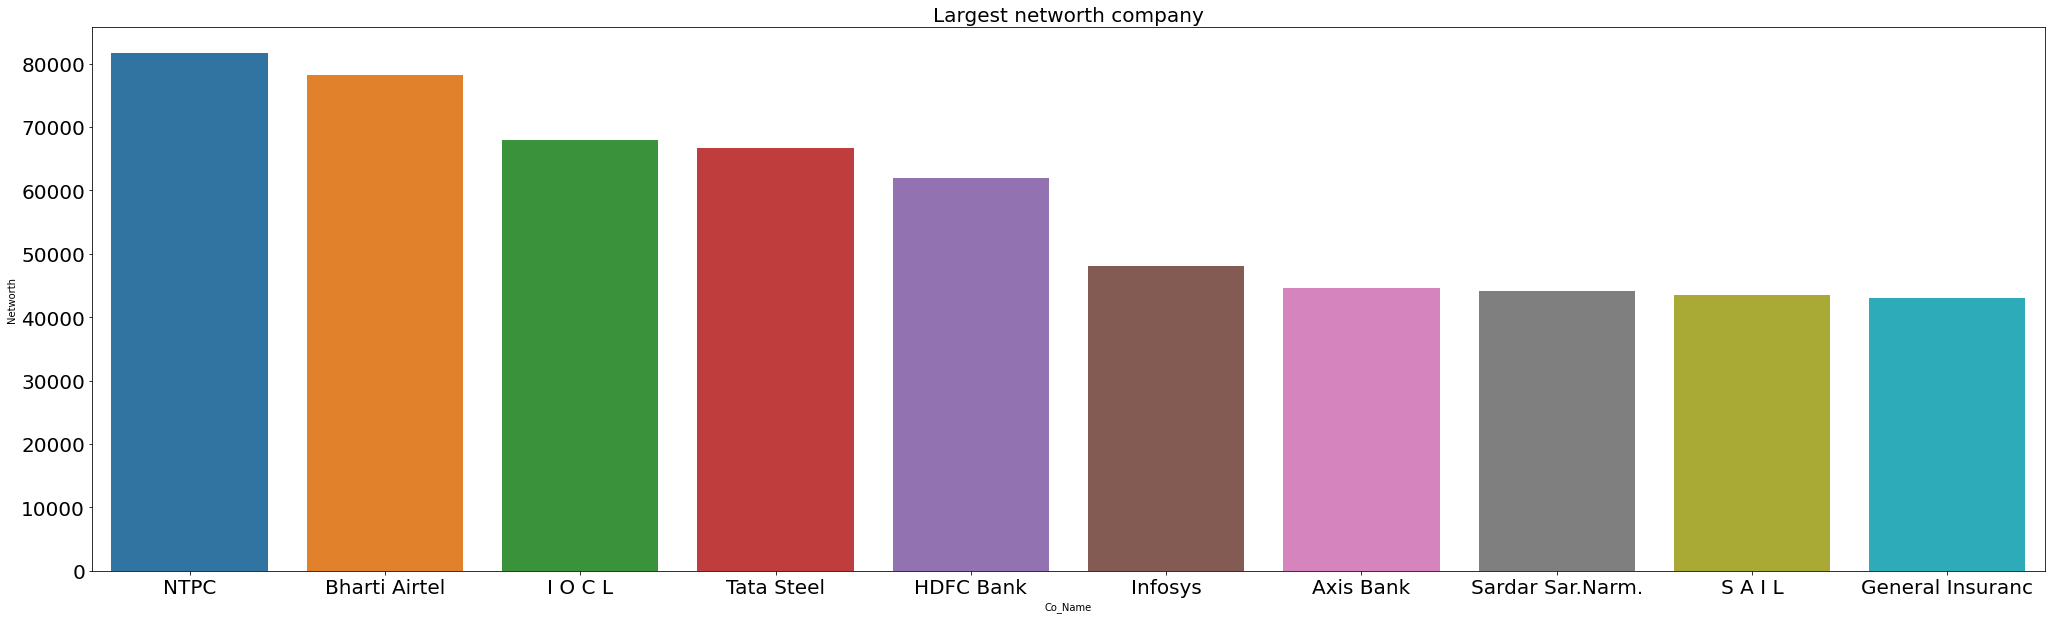

In [15]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Networth',data=net.head(10))
plt.title("Largest networth company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

NTPC has highest networth followed by the Bharti Airtel

In [16]:
Company_debt = Company.sort_values(by="Total_Debt",ascending=False)
Company_debt.head()

Co_Code           Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
3572     5456    Bank of Baroda            40198.98          443.56  38848.05   
3561     5654     Bank of India            26310.46          665.65  27891.59   
3568     7855  Punjab Natl.Bank            35465.36          370.91  37691.97   
3581     4987         HDFC Bank            72677.77          501.30  62009.42   
3579     5554         Axis Bank            53164.91          474.10  44676.51   

      Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
3572         714001.25   652823.81      5554.19                 0.00   
3561         615142.63   571963.75      5210.13                 0.00   
3568         602355.88   547049.19      5290.13                 0.00   
3581         590576.00   496009.19      8463.30                 0.00   
3579         461977.78   402200.22      4497.01                 0.00   

      Curr_Assets  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
3572    721166.00  ...                0.00               0.00   
3561    542253.81  ...                0.00               0.00   
3568    482024.22  ...                0.00               0.00   
3581    444633.50  ...                0.00               0.00   
3579    358193.47  ...                0.00               0.00   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  Debtors_Vel_Days  \
3572               0.00             0.00               0.00                 0   
3561               0.00             0.00               0.00                 0   
3568               0.00             0.00               0.00                 0   
3581               0.00             0.00               0.00                 0   
3579               0.00             0.00               0.00                 0   

      Creditors_Vel_Days  Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
3572                   0                0.00                             0.67   
3561                   0                0.00                             0.81   
3568                   0                0.00                             0.81   
3581                   0                 nan                             0.60   
3579                   0                 nan                             0.66   

      Value_of_Output_to_Gross_Block  
3572                            5.29  
3561                            8.48  
3568                            8.53  
3581                            7.76  
3579                            8.43  

[5 rows x 67 columns]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bank of Baroda'),
  Text(1, 0, 'Bank of India'),
  Text(2, 0, 'Punjab Natl.Bank'),
  Text(3, 0, 'HDFC Bank'),
  Text(4, 0, 'Axis Bank'),
  Text(5, 0, 'IDBI Bank'),
  Text(6, 0, 'Syndicate Bank'),
  Text(7, 0, 'Oriental Bank'),
  Text(8, 0, 'Corporation Bank'),
  Text(9, 0, 'H D F C')])

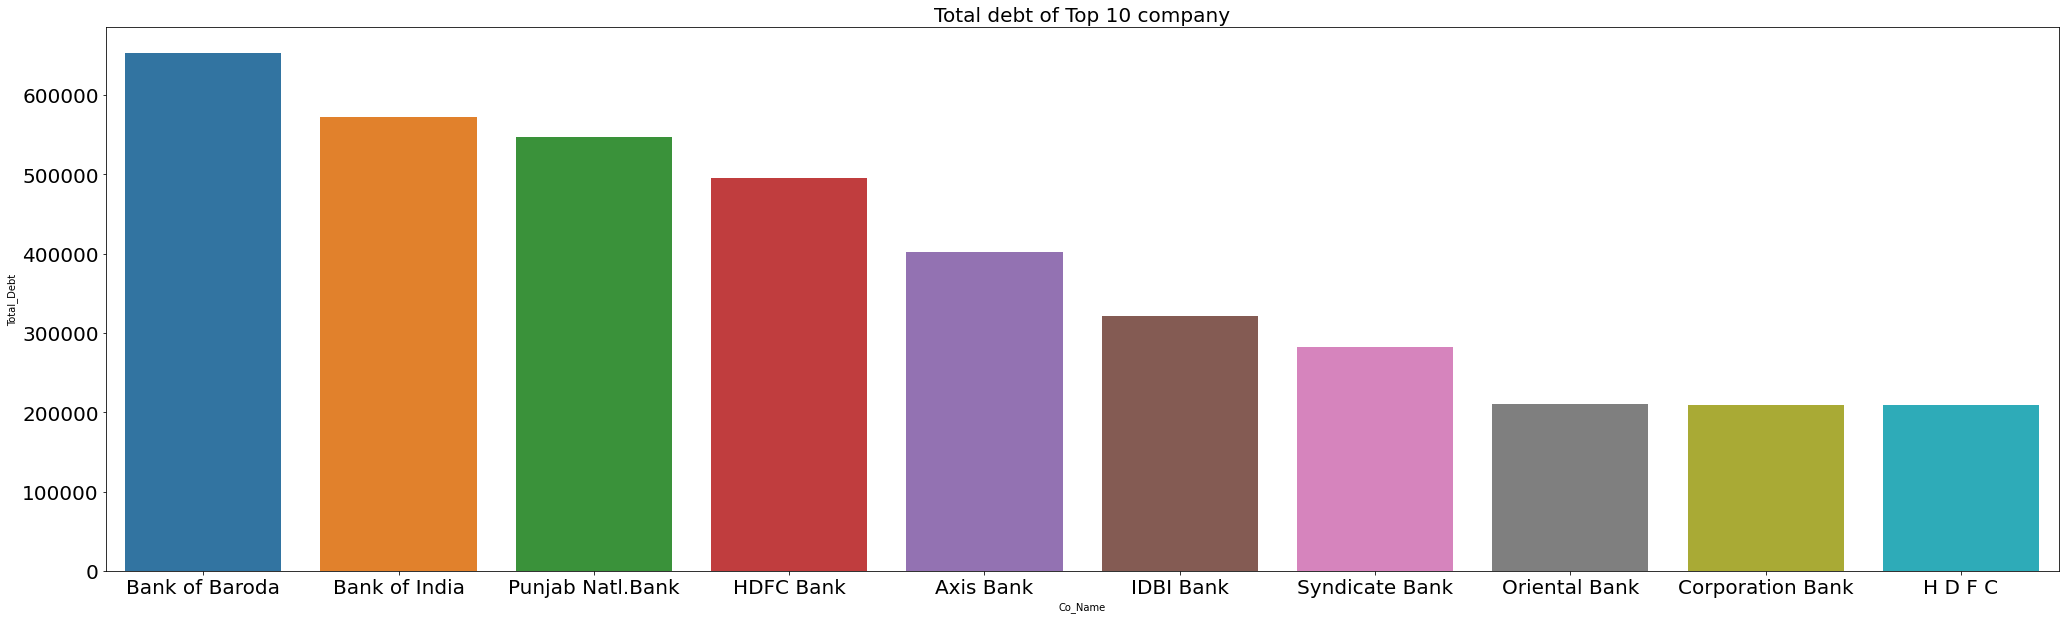

In [19]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Total_Debt',data=Company_debt.head(10))
plt.title("Total debt of Top 10 company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

Highest debt Company is Bank of Baroda
Second Highest is Bank of india

In [20]:
C_assests = Company.sort_values(by="Curr_Assets",ascending=False)
C_assests.head()

Co_Code           Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
3572     5456    Bank of Baroda            40198.98          443.56  38848.05   
3561     5654     Bank of India            26310.46          665.65  27891.59   
3568     7855  Punjab Natl.Bank            35465.36          370.91  37691.97   
3581     4987         HDFC Bank            72677.77          501.30  62009.42   
3579     5554         Axis Bank            53164.91          474.10  44676.51   

      Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
3572         714001.25   652823.81      5554.19                 0.00   
3561         615142.63   571963.75      5210.13                 0.00   
3568         602355.88   547049.19      5290.13                 0.00   
3581         590576.00   496009.19      8463.30                 0.00   
3579         461977.78   402200.22      4497.01                 0.00   

      Curr_Assets  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
3572    721166.00  ...                0.00               0.00   
3561    542253.81  ...                0.00               0.00   
3568    482024.22  ...                0.00               0.00   
3581    444633.50  ...                0.00               0.00   
3579    358193.47  ...                0.00               0.00   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  Debtors_Vel_Days  \
3572               0.00             0.00               0.00                 0   
3561               0.00             0.00               0.00                 0   
3568               0.00             0.00               0.00                 0   
3581               0.00             0.00               0.00                 0   
3579               0.00             0.00               0.00                 0   

      Creditors_Vel_Days  Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
3572                   0                0.00                             0.67   
3561                   0                0.00                             0.81   
3568                   0                0.00                             0.81   
3581                   0                 nan                             0.60   
3579                   0                 nan                             0.66   

      Value_of_Output_to_Gross_Block  
3572                            5.29  
3561                            8.48  
3568                            8.53  
3581                            7.76  
3579                            8.43  

[5 rows x 67 columns]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bank of Baroda'),
  Text(1, 0, 'Bank of India'),
  Text(2, 0, 'Punjab Natl.Bank'),
  Text(3, 0, 'HDFC Bank'),
  Text(4, 0, 'Axis Bank'),
  Text(5, 0, 'IDBI Bank'),
  Text(6, 0, 'Syndicate Bank'),
  Text(7, 0, 'H D F C'),
  Text(8, 0, 'Power Fin.Corpn.'),
  Text(9, 0, 'Rural Elec.Corp.')])

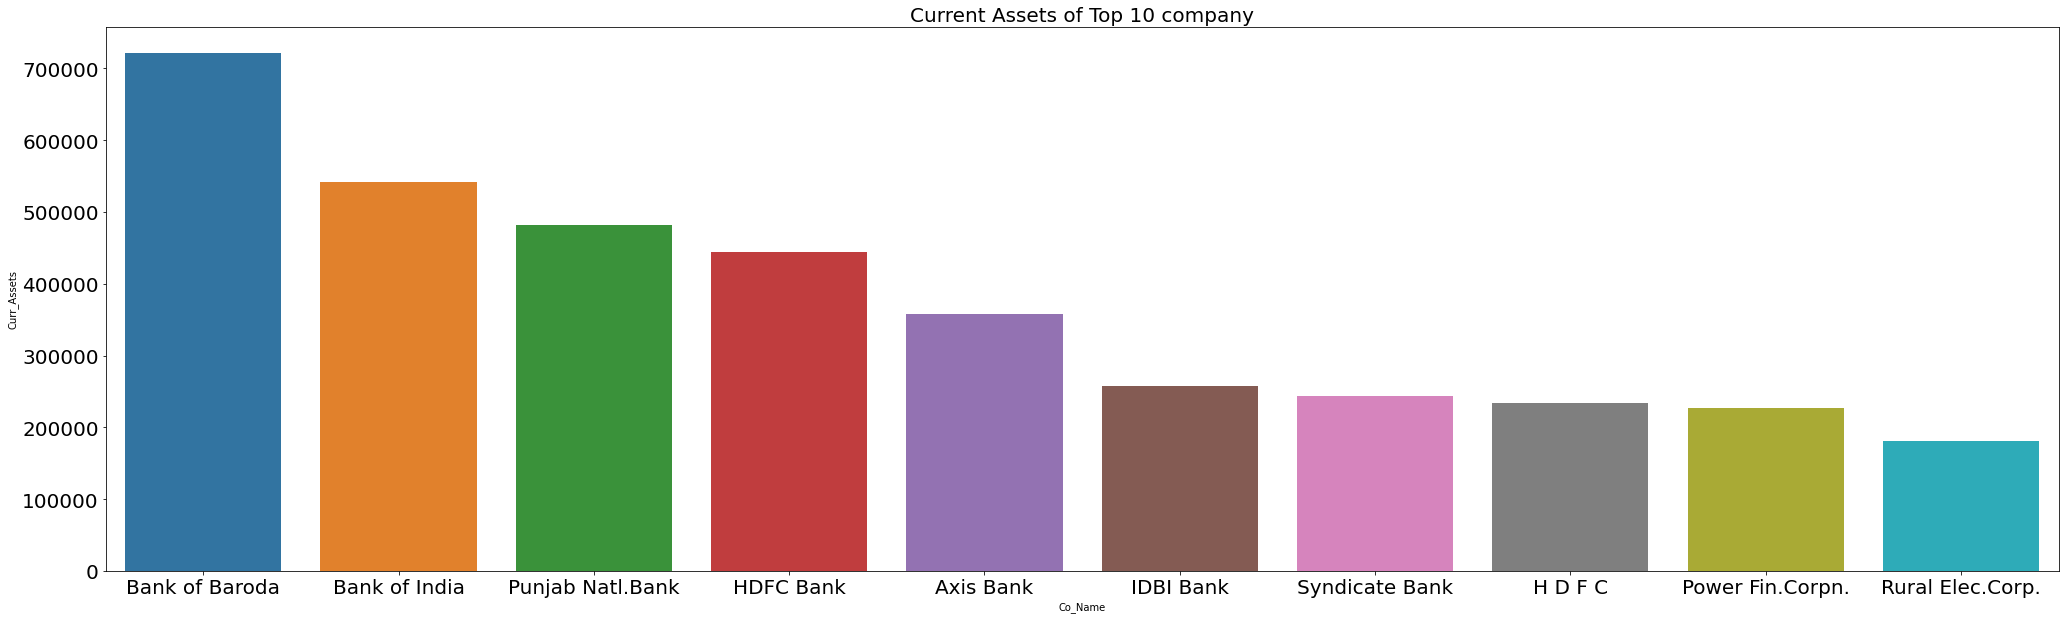

In [21]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Curr_Assets',data=C_assests.head(10))
plt.title("Current Assets of Top 10 company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

Highest current assets company is Bank of Baroda
Second highest current assets company is Bank of India

In [22]:
Company.corr()

Co_Code  Networth_Next_Year  \
Co_Code                               1.00               -0.05   
Networth_Next_Year                   -0.05                1.00   
Equity_Paid_Up                       -0.01                0.36   
Networth                             -0.06                0.97   
Capital_Employed                     -0.04                0.59   
Total_Debt                           -0.04                0.48   
Gross_Block                          -0.04                0.74   
Net_Working_Capital                  -0.02                0.24   
Curr_Assets                          -0.04                0.48   
Curr_Liab_and_Prov                   -0.06                0.78   
Total_Assets_to_Liab                 -0.05                0.82   
Gross_Sales                          -0.04                0.59   
Net_Sales                            -0.04                0.60   
Other_Income                         -0.05                0.68   
Value_Of_Output                      -0.04                0.61   
Cost_of_Prod                         -0.03                0.50   
Selling_Cost                         -0.06                0.36   
PBIDT                                -0.05                0.76   
PBDT                                 -0.05                0.86   
PBIT                                 -0.05                0.70   
PBT                                  -0.05                0.81   
PAT                                  -0.04                0.79   
Adjusted_PAT                         -0.04                0.78   
CP                                   -0.05                0.85   
Rev_earn_in_forex                    -0.04                0.44   
Rev_exp_in_forex                     -0.03                0.40   
Capital_exp_in_forex                 -0.02                0.57   
Book_Value_Unit_Curr                  0.05                0.03   
Book_Value_Adj_Unit_Curr             -0.01                0.00   
Market_Capitalisation                -0.06                0.70   
CEPS_annualised_Unit_Curr             0.04                0.01   
Cash_Flow_From_Opr                   -0.01                0.34   
Cash_Flow_From_Inv                    0.01               -0.56   
Cash_Flow_From_Fin                    0.01               -0.02   
ROG_Net_Worth_perc                    0.06                0.00   
ROG_Capital_Employed_perc             0.05                0.00   
ROG_Gross_Block_perc                  0.01               -0.00   
ROG_Gross_Sales_perc                  0.04               -0.01   
ROG_Net_Sales_perc                    0.04               -0.01   
ROG_Cost_of_Prod_perc                 0.06               -0.01   
ROG_Total_Assets_perc                 0.05                0.00   
ROG_PBIDT_perc                        0.03               -0.00   
ROG_PBDT_perc                         0.03               -0.00   
ROG_PBIT_perc                         0.03               -0.00   
ROG_PBT_perc                          0.03               -0.00   
ROG_PAT_perc                          0.03               -0.00   
ROG_CP_perc                           0.03               -0.00   
ROG_Rev_earn_in_forex_perc           -0.01                0.02   
ROG_Rev_exp_in_forex_perc            -0.00               -0.00   
ROG_Market_Capitalisation_perc       -0.02               -0.00   
Curr_Ratio_Latest                     0.04               -0.01   
Fixed_Assets_Ratio_Latest             0.04               -0.01   
Inventory_Ratio_Latest                0.00                0.19   
Debtors_Ratio_Latest                 -0.01               -0.00   
Total_Asset_Turnover_Ratio_Latest     0.06               -0.03   
Interest_Cover_Ratio_Latest           0.01                0.03   
PBIDTM_perc_Latest                    0.00                0.01   
PBITM_perc_Latest                    -0.01                0.01   
PBDTM_perc_Latest                    -0.01                0.00   
CPM_perc_Latest                      -0.01                0.00   
APATM_per

Let's drop the columns Co_Code and Co_name

In [23]:
Company = Company.drop(['Co_Code', 'Co_Name'], axis = 1)
Company.head()

Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  \
0            -8021.60          419.36  -7027.48          -1007.24     5936.03   
1            -3986.19         1954.93  -2968.08           4458.20     7410.18   
2            -3192.58           53.84    506.86           7714.68     6944.54   
3            -3054.51          157.30   -623.49           2353.88     2326.05   
4            -2967.36           50.30  -1070.83           4675.33     5740.90   

   Gross_Block  Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  \
0       474.30             -1076.34        40.50             1116.85   
1      9070.86             -1098.88       486.86             1585.74   
2      1281.54              4496.25      9097.64             4601.39   
3      1033.69             -2612.42      1034.12             3646.54   
4      1084.20              1836.23      4685.81             2849.58   

   Total_Assets_to_Liab  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
0                109.60  ...                0.00               0.00   
1               6043.94  ...              -10.30             -39.74   
2              12316.07  ...            -5279.14           -5516.98   
3               6000.42  ...               -3.33              -7.21   
4               7524.91  ...             -295.55            -400.55   

   PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  Debtors_Vel_Days  \
0               0.00             0.00               0.00                 0   
1             -57.74           -57.74             -87.18                29   
2           -7780.25         -7723.67           -7961.51                97   
3             -48.13           -47.70             -51.58                93   
4            -845.88           379.79             274.79              3887   

   Creditors_Vel_Days  Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
0                   0               45.00                             0.00   
1                 101                2.00                             0.31   
2                 558                0.00                            -0.03   
3                  63                2.00                             0.24   
4                 346                0.00                             0.01   

   Value_of_Output_to_Gross_Block  
0                            0.00  
1                            0.24  
2                           -0.26  
3                            1.90  
4                            0.05  

[5 rows x 65 columns]

Checking distribution of all variables

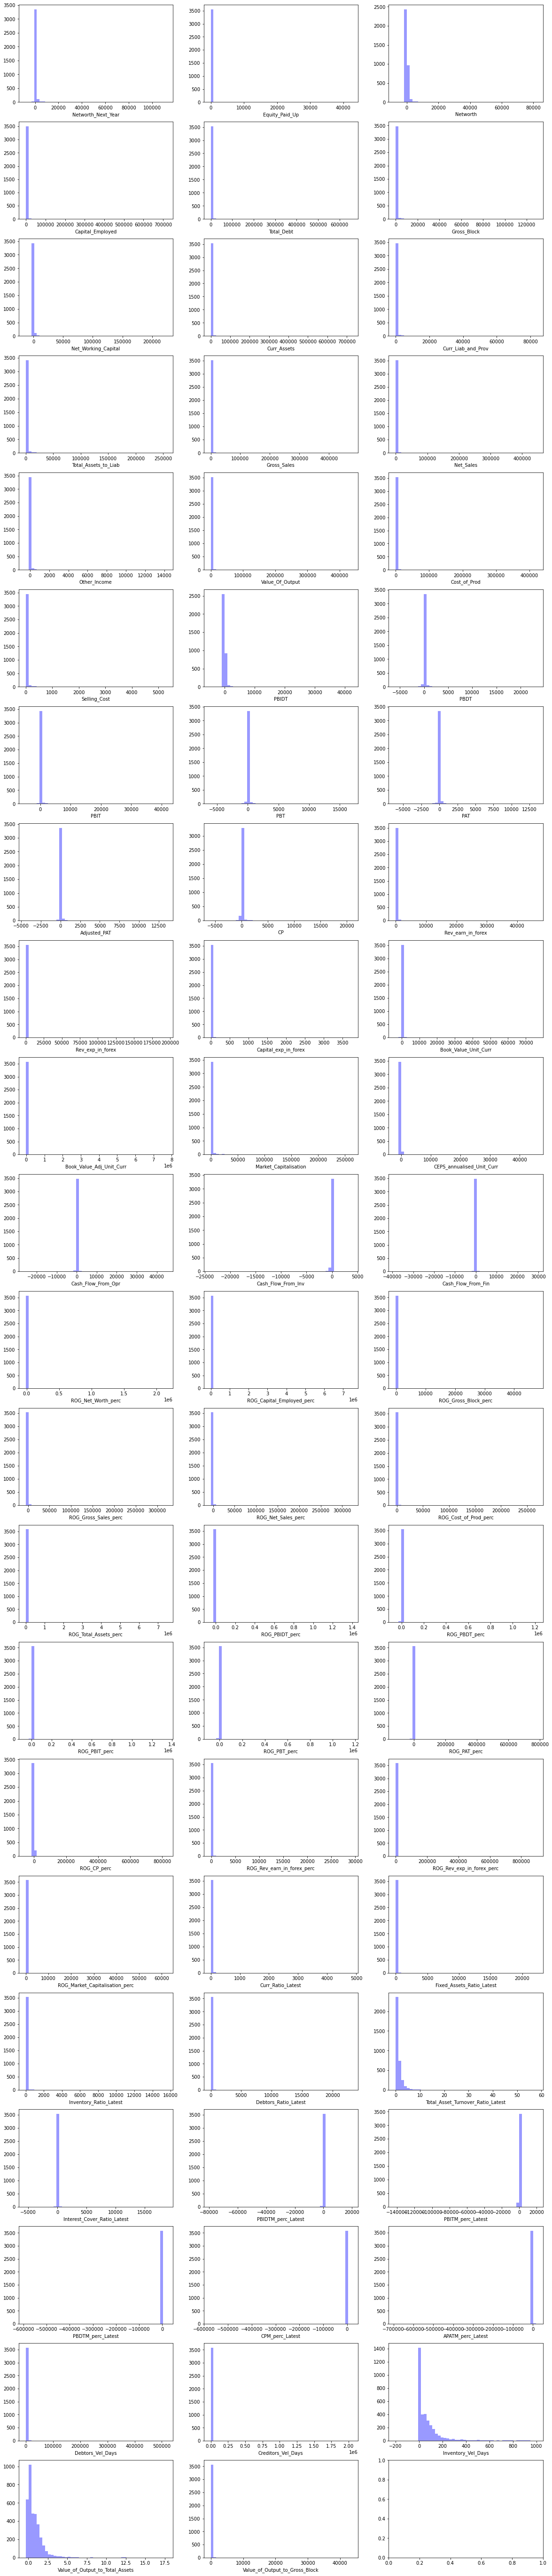

In [24]:
fig, ax = plt.subplots(figsize = (20, 100), nrows = 22, ncols = 3)

for i, col in enumerate(Company.columns):
        sns.distplot(Company[col], ax = ax[i//3, i%3], kde = False, color = 'blue')

Checking outliers in the data

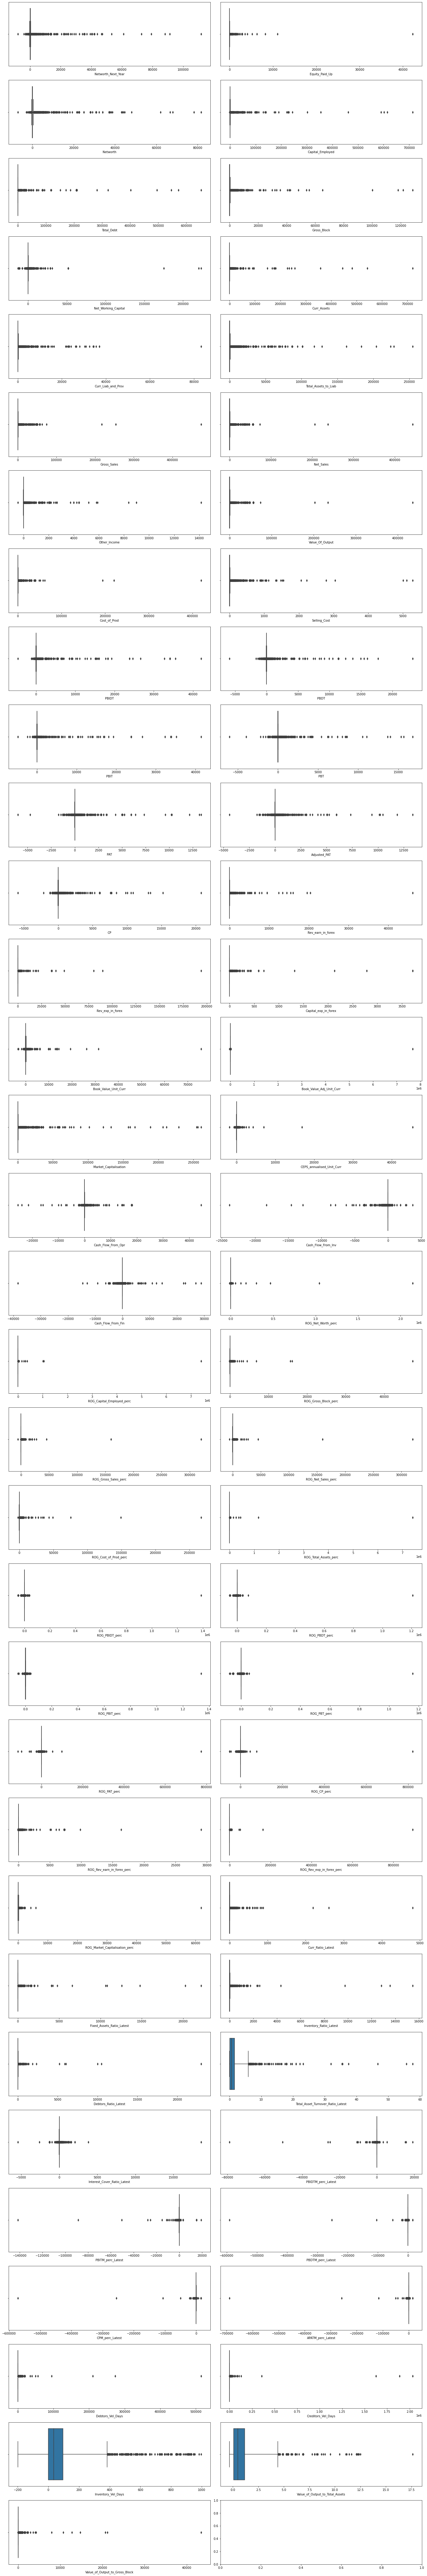

In [23]:
fig, ax = plt.subplots(figsize = (20, 120), nrows = 33, ncols = 2)

for i, col in enumerate(Company.columns):
    sns.boxplot(x = Company[col], ax = ax[i//2, i%2], whis = 3) #extreme whiskers
    
plt.tight_layout(pad = 1.1)

Checking skewness in the data

In [24]:
pd.DataFrame(Company.skew().sort_values(ascending=False),columns=['Skewness'])

Skewness
Book_Value_Adj_Unit_Curr              59.84
ROG_PBIT_perc                         58.93
ROG_PBIDT_perc                        58.88
ROG_PBDT_perc                         58.41
ROG_PBT_perc                          57.33
ROG_Market_Capitalisation_perc        57.33
ROG_Total_Assets_perc                 57.30
ROG_Rev_exp_in_forex_perc             56.81
ROG_CP_perc                           56.79
ROG_Capital_Employed_perc             56.44
ROG_PAT_perc                          52.64
CEPS_annualised_Unit_Curr             48.53
Equity_Paid_Up                        45.93
ROG_Net_Sales_perc                    45.41
ROG_Gross_Sales_perc                  45.40
ROG_Gross_Block_perc                  44.87
ROG_Net_Worth_perc                    44.83
Interest_Cover_Ratio_Latest           40.82
Debtors_Vel_Days                      38.66
ROG_Cost_of_Prod_perc                 37.27
Debtors_Ratio_Latest                  35.26
Rev_exp_in_forex                      34.84
Cost_of_Prod                          34.59
Creditors_Vel_Days                    34.12
Book_Value_Unit_Curr                  32.98
Value_of_Output_to_Gross_Block        32.00
Gross_Sales                           31.56
Curr_Ratio_Latest                     31.25
Net_Sales                             31.09
ROG_Rev_earn_in_forex_perc            31.05
Value_Of_Output                       30.81
Net_Working_Capital                   30.58
Capital_exp_in_forex                  27.61
Inventory_Ratio_Latest                27.00
Rev_earn_in_forex                     24.18
Fixed_Assets_Ratio_Latest             24.12
Curr_Assets                           20.78
Total_Debt                            19.42
Selling_Cost                          18.88
Other_Income                          18.81
Gross_Block                           18.53
Capital_Employed                      18.07
Curr_Liab_and_Prov                    15.29
Market_Capitalisation                 14.39
CP                                    14.35
PBIT                                  14.01
Adjusted_PAT                          13.88
PBDT                                  13.56
Total_Assets_to_Liab                  13.37
PBIDT                                 13.18
PBT                                   13.13
PAT                                   13.07
Networth_Next_Year                    13.04
Networth                              11.74
Total_Asset_Turnover_Ratio_Latest     10.36
Cash_Flow_From_Opr                     6.63
Value_of_Output_to_Total_Assets        4.70
Inventory_Vel_Days                     3.49
Cash_Flow_From_Fin                     1.70
Cash_Flow_From_Inv                   -21.57
PBIDTM_perc_Latest                   -30.93
PBITM_perc_Latest                    -36.00
CPM_perc_Latest                      -47.01
PBDTM_perc_Latest                    -47.75
APATM_perc_Latest                    -49.28

None of the variables show perfect normal distribution. Most of the variables have left postive skewness only six variable right negative skewness

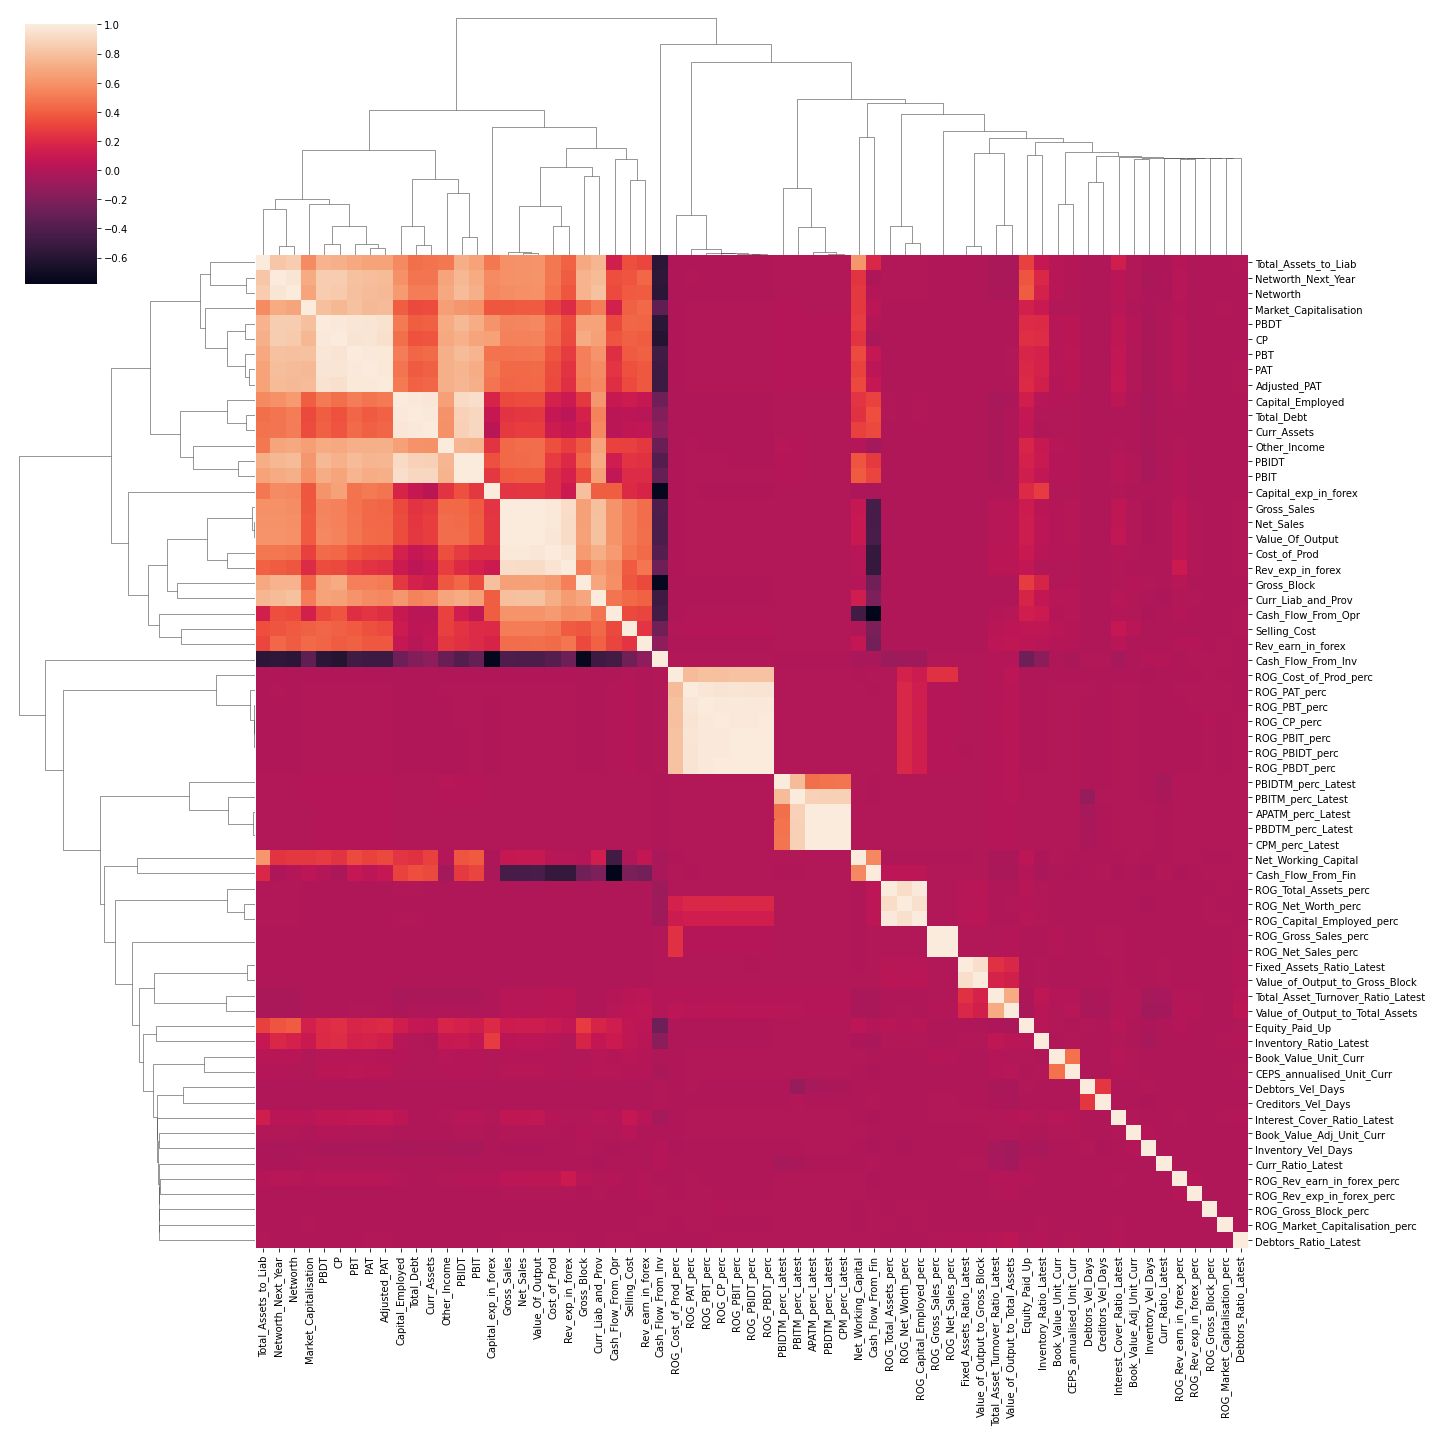

In [25]:
sns.clustermap(Company.corr(),figsize=(20,20))

<AxesSubplot:>

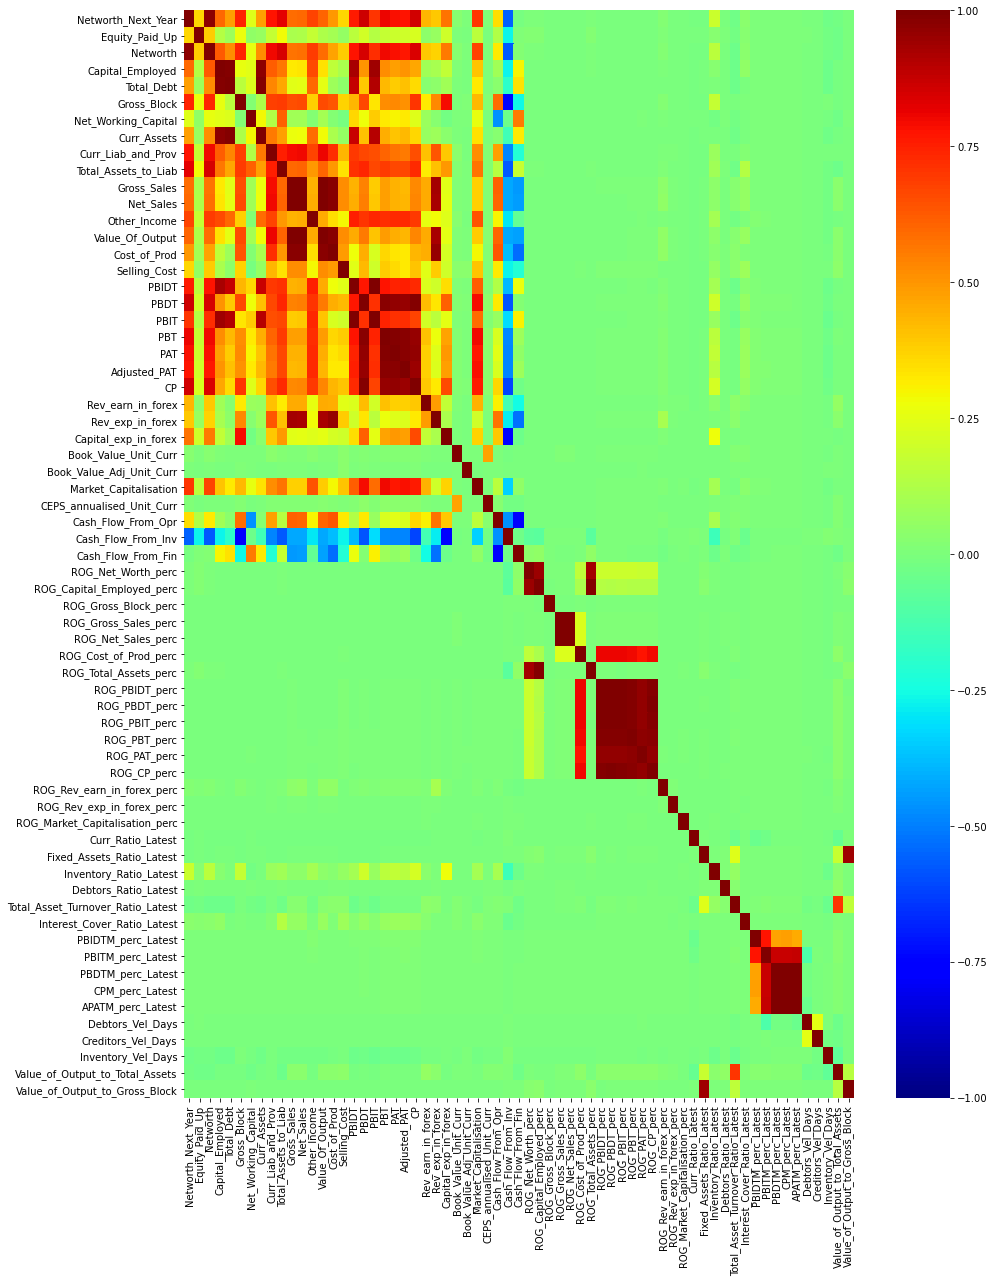

In [27]:
plt.figure(figsize = (15,20))
cor_matrix = Company.corr()
sns.heatmap(cor_matrix, cmap = 'jet', vmin = -1, vmax= 1)

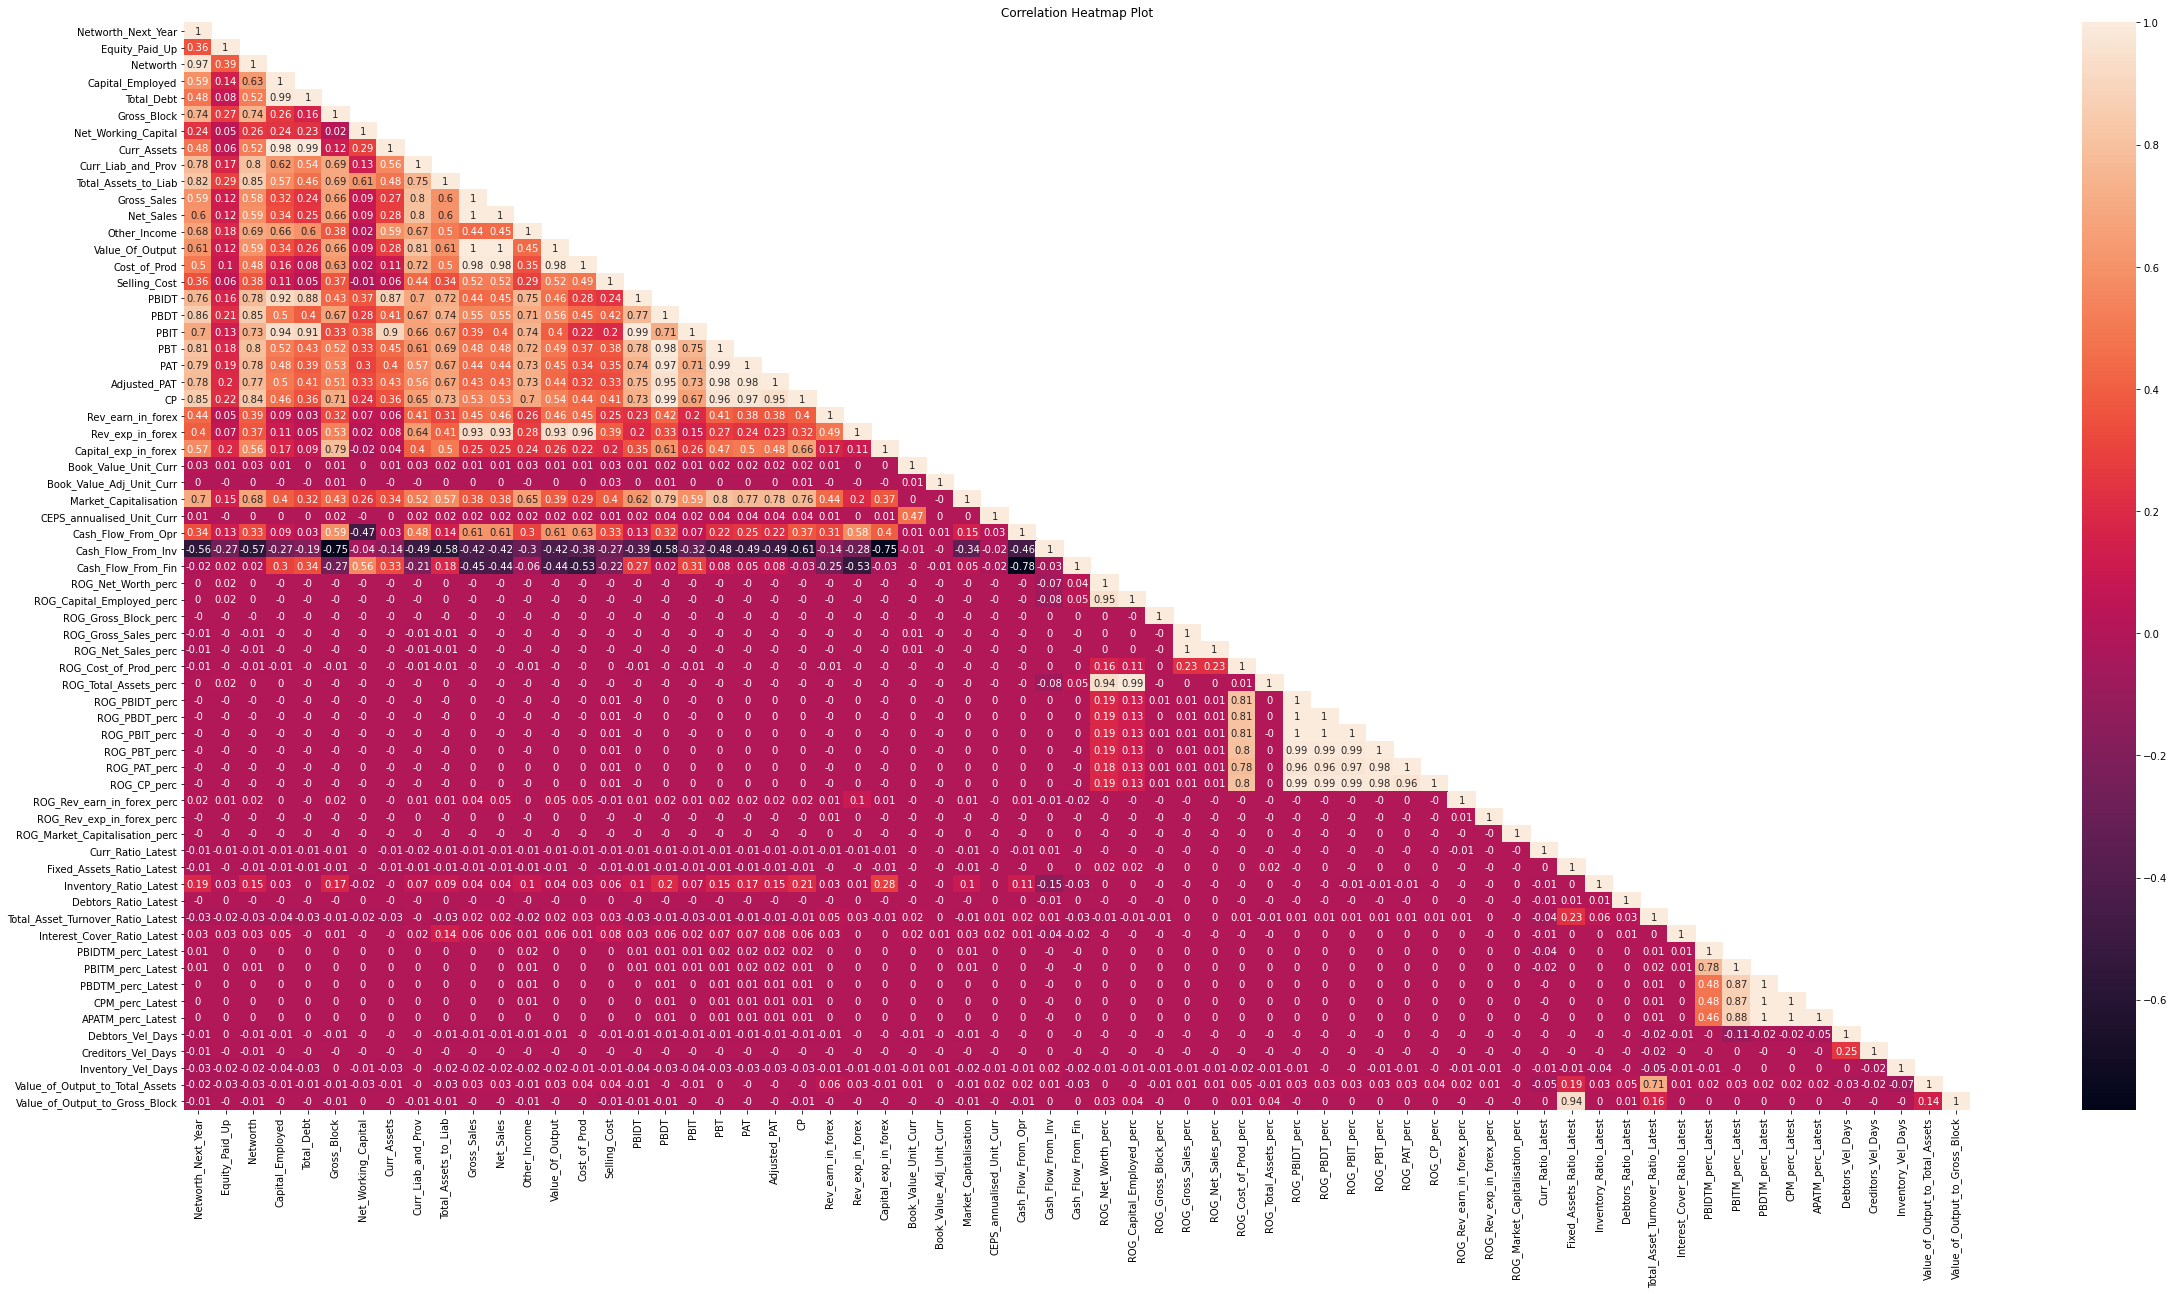

In [28]:
plt.figure(figsize=(40,20))
sns.heatmap(round(Company.corr(),2), annot=True,mask=np.triu(Company.corr(),+1));
plt.title('Correlation Heatmap Plot')
plt.show()

Some of the variables are highly postive correlated and there are slightly negative correlated.

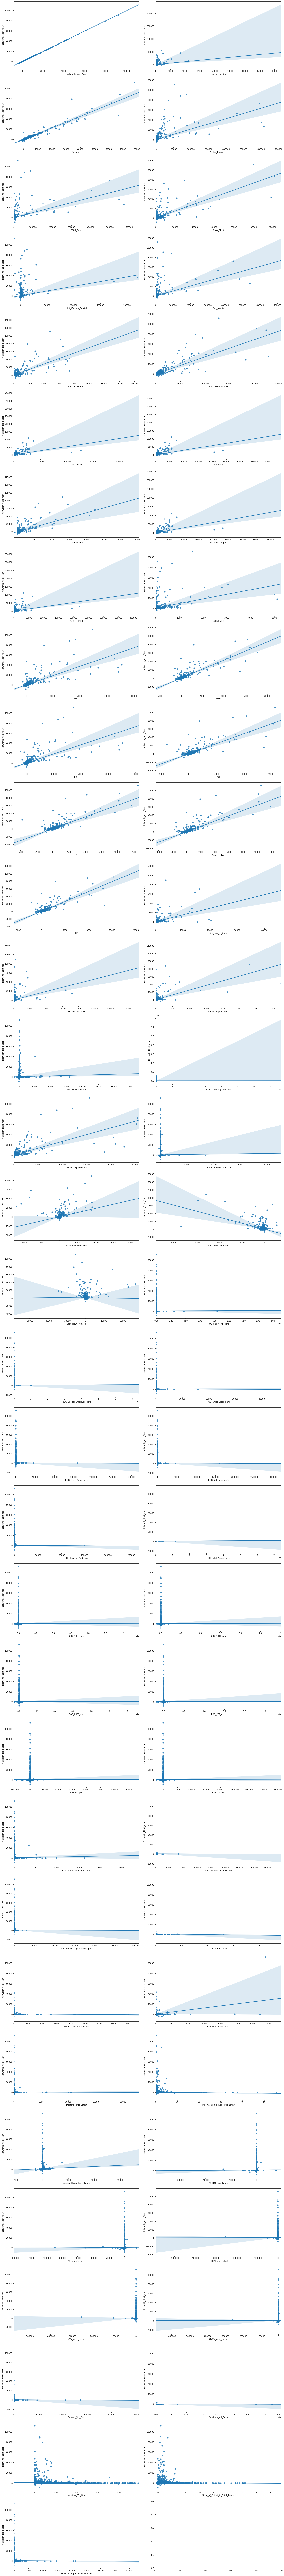

In [29]:
fig, ax = plt.subplots(figsize = (20, 180), nrows = 33, ncols = 2)

for i, col in enumerate(Company.columns):
    sns.regplot(x = Company[col], y = Company['Networth_Next_Year'], ax = ax[i//2, i%2])
    
plt.tight_layout(pad = 1.1)

Creating a binary target variable using 'Networth_Next_Year'

In [30]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [31]:
Company[['default','Networth_Next_Year']].head(10)

default  Networth_Next_Year
0        1            -8021.60
1        1            -3986.19
2        1            -3192.58
3        1            -3054.51
4        1            -2967.36
5        1            -2519.40
6        1            -2125.05
7        1            -2100.56
8        1            -1695.75
9        1            -1677.18

In [32]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

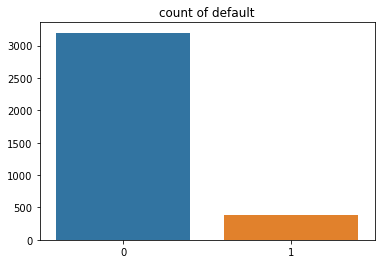

0   0.89
1   0.11
Name: default, dtype: float64


In [33]:
sns.barplot(Company.default.value_counts().index,Company.default.value_counts().values)
plt.title("count of default")
plt.show()
print(Company.default.value_counts(normalize=True))

Before Outlier treatment, let's get the default variable from the column "Networth_Next_Year"<br>
When net worth next year is negative then 1<br>
When net worth next year is positive then 0 <br>
Nearly 11% of defaulters are observed in this dataset

In [34]:
Company.groupby(Company['default']).sum()

Networth_Next_Year  Equity_Paid_Up   Networth  Capital_Employed  \
default                                                                    
0                2667204.13       214372.52 2373938.94        9967572.63   
1                 -67191.86        11425.65  -43948.71          71832.61   

         Total_Debt  Gross_Block  Net_Working_Capital  Curr_Assets  \
default                                                              
0        7046658.81   2059120.06           1462211.15   6968271.01   
1         106779.26     71605.22             10952.31     61541.12   

         Curr_Liab_and_Prov  Total_Assets_to_Liab  ...  PBIDTM_perc_Latest  \
default                                            ...                       
0                1355094.96            6255113.91  ...          -124452.24   
1                  50588.63             122421.24  ...           -58966.72   

         PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
default                                                          
0               -193784.40         -452373.46       -463494.89   
1               -197745.69         -664606.27       -637120.30   

         APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
default                                                            
0               -532827.17           1983309             5105452   
1               -775899.26            182255             2274016   

         Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
default                                                        
0                 243673.00                          2757.62   
1                  33729.00                           182.03   

         Value_of_Output_to_Gross_Block  
default                                  
0                             220144.65  
1                               1773.34  

[2 rows x 65 columns]

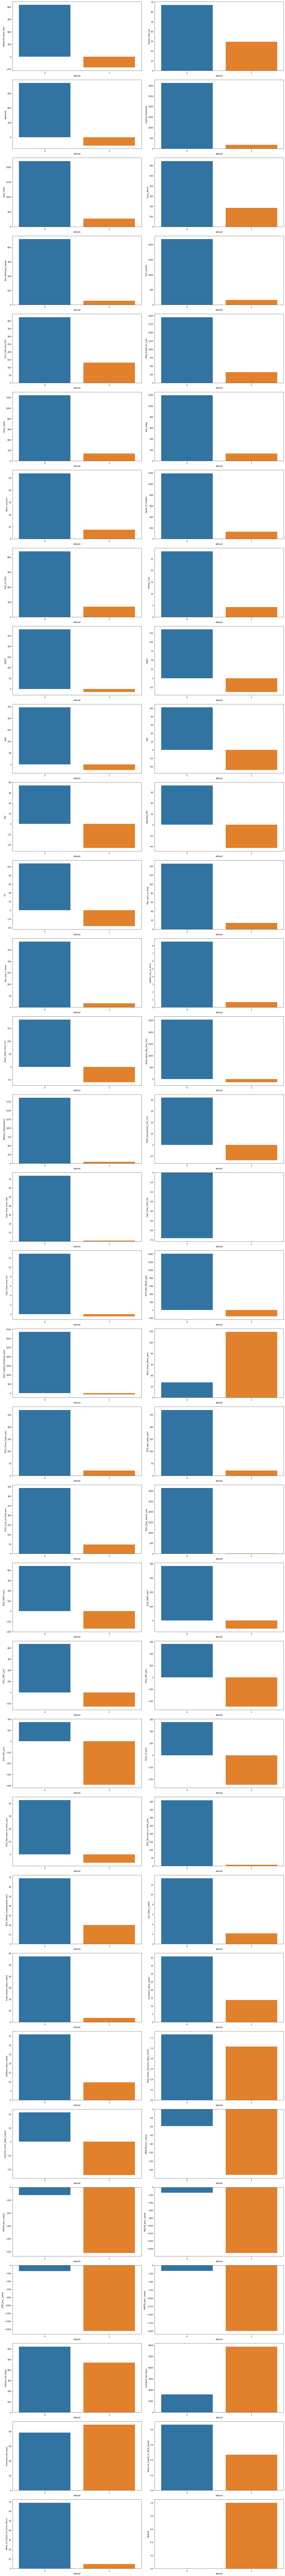

In [35]:
fig, ax = plt.subplots(figsize = (20, 180), nrows = 33, ncols = 2)

for i, col in enumerate(Company.columns):
    sns.barplot(x = Company['default'], y = Company[col], ax = ax[i//2, i%2],ci=None)
    
plt.tight_layout(pad = 1.1)

In [36]:
Company = Company.drop(['Networth_Next_Year'], axis = 1)
Company.head()

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
0          419.36  -7027.48          -1007.24     5936.03       474.30   
1         1954.93  -2968.08           4458.20     7410.18      9070.86   
2           53.84    506.86           7714.68     6944.54      1281.54   
3          157.30   -623.49           2353.88     2326.05      1033.69   
4           50.30  -1070.83           4675.33     5740.90      1084.20   

   Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  Total_Assets_to_Liab  \
0             -1076.34        40.50             1116.85                109.60   
1             -1098.88       486.86             1585.74               6043.94   
2              4496.25      9097.64             4601.39              12316.07   
3             -2612.42      1034.12             3646.54               6000.42   
4              1836.23      4685.81             2849.58               7524.91   

   Gross_Sales  ...  PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
0         0.00  ...               0.00               0.00             0.00   
1      2892.73  ...             -39.74             -57.74           -57.74   
2       392.13  ...           -5516.98           -7780.25         -7723.67   
3      1354.39  ...              -7.21             -48.13           -47.70   
4        38.72  ...            -400.55            -845.88           379.79   

   APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
0               0.00                 0                   0   
1             -87.18                29                 101   
2           -7961.51                97                 558   
3             -51.58                93                  63   
4             274.79              3887                 346   

   Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
0               45.00                             0.00   
1                2.00                             0.31   
2                0.00                            -0.03   
3                2.00                             0.24   
4                0.00                             0.01   

   Value_of_Output_to_Gross_Block  default  
0                            0.00        1  
1                            0.24        1  
2                           -0.26        1  
3                            1.90        1  
4                            0.05        1  

[5 rows x 65 columns]

Lets check for missing values in the dataset

In [37]:
print(Company.isnull().sum())

Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Curr_Assets                            0
Curr_Liab_and_Prov                     0
Total_Assets_to_Liab                   0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Prod                           0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Rev_earn_in_forex                      0
Rev_exp_in_forex                       0
Capital_exp_in_f

In [38]:
Company.size

233090

In [39]:
Company.isnull().sum().sum()

118

There are missing values in the dataset

In [40]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [41]:
Company_X.head()

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
0          419.36  -7027.48          -1007.24     5936.03       474.30   
1         1954.93  -2968.08           4458.20     7410.18      9070.86   
2           53.84    506.86           7714.68     6944.54      1281.54   
3          157.30   -623.49           2353.88     2326.05      1033.69   
4           50.30  -1070.83           4675.33     5740.90      1084.20   

   Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  Total_Assets_to_Liab  \
0             -1076.34        40.50             1116.85                109.60   
1             -1098.88       486.86             1585.74               6043.94   
2              4496.25      9097.64             4601.39              12316.07   
3             -2612.42      1034.12             3646.54               6000.42   
4              1836.23      4685.81             2849.58               7524.91   

   Gross_Sales  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  PBDTM_perc_Latest  \
0         0.00  ...                0.00               0.00               0.00   
1      2892.73  ...              -10.30             -39.74             -57.74   
2       392.13  ...            -5279.14           -5516.98           -7780.25   
3      1354.39  ...               -3.33              -7.21             -48.13   
4        38.72  ...             -295.55            -400.55            -845.88   

   CPM_perc_Latest  APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
0             0.00               0.00                 0                   0   
1           -57.74             -87.18                29                 101   
2         -7723.67           -7961.51                97                 558   
3           -47.70             -51.58                93                  63   
4           379.79             274.79              3887                 346   

   Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
0               45.00                             0.00   
1                2.00                             0.31   
2                0.00                            -0.03   
3                2.00                             0.24   
4                0.00                             0.01   

   Value_of_Output_to_Gross_Block  
0                            0.00  
1                            0.24  
2                           -0.26  
3                            1.90  
4                            0.05  

[5 rows x 64 columns]

Let's check the number of outliers per column

In [42]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [43]:
((Company_X > UL) | (Company_X < LL)).sum()

Equity_Paid_Up                        448
Networth                              650
Capital_Employed                      596
Total_Debt                            583
Gross_Block                           540
Net_Working_Capital                   625
Curr_Assets                           577
Curr_Liab_and_Prov                    581
Total_Assets_to_Liab                  574
Gross_Sales                           554
Net_Sales                             556
Other_Income                          603
Value_Of_Output                       559
Cost_of_Prod                          560
Selling_Cost                          605
PBIDT                                 671
PBDT                                  815
PBIT                                  720
PBT                                   941
PAT                                   959
Adjusted_PAT                          954
CP                                    816
Rev_earn_in_forex                     738
Rev_exp_in_forex                  

In [44]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [45]:
Company_X.isnull().sum()

Equity_Paid_Up                        448
Networth                              650
Capital_Employed                      596
Total_Debt                            583
Gross_Block                           540
Net_Working_Capital                   625
Curr_Assets                           577
Curr_Liab_and_Prov                    581
Total_Assets_to_Liab                  574
Gross_Sales                           554
Net_Sales                             556
Other_Income                          603
Value_Of_Output                       559
Cost_of_Prod                          560
Selling_Cost                          605
PBIDT                                 671
PBDT                                  815
PBIT                                  720
PBT                                   941
PAT                                   959
Adjusted_PAT                          954
CP                                    816
Rev_earn_in_forex                     738
Rev_exp_in_forex                  

Since the outliers are too large in the number.it will affect the model.but Also given the fact that this
is a financial data and the outliers might very well reflect the information which is genuine
in nature. Since data captured from different size of companies

Although most outliers have nan values which is a missing data which should be treated with missing data imputation method .here KNN imputation method is used 

In [46]:
Company_X.isnull().sum().sum()

41473

In [47]:
Company_X.shape

(3586, 64)

In [48]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

Let's visually inspect the missing values in our data

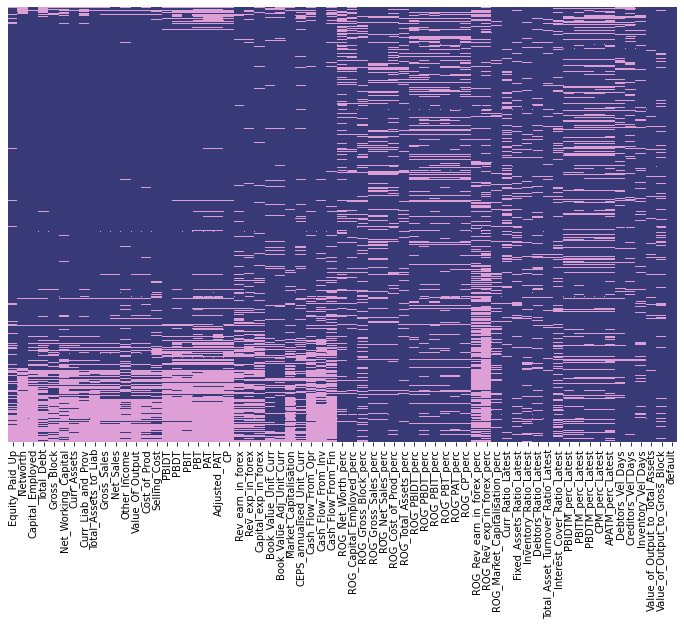

In [49]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'tab20b', yticklabels = False)
plt.show()

We should inspect total missing values by each row.

In [50]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

Let's filter the data which is 90% or more complete at the row level.

In [52]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [53]:
Company_sub1_temp.shape

(1203, 65)

In [54]:
Company_sub1_temp['default'].value_counts()

0    1085
1     118
Name: default, dtype: int64

If we consider availability of features for deciding the observations to be considered, we will end up losing more than 90% of the actual defaulters.



In [55]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [56]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG_Rev_exp_in_forex_perc           0.45
ROG_Rev_earn_in_forex_perc          0.37
Cash_Flow_From_Fin                  0.28
PAT                                 0.27
Adjusted_PAT                        0.27
PBT                                 0.26
APATM_perc_Latest                   0.26
Cash_Flow_From_Inv                  0.24
ROG_Gross_Block_perc                0.23
CP                                  0.23
PBDT                                0.23
Cash_Flow_From_Opr                  0.22
ROG_Net_Worth_perc                  0.21
Rev_earn_in_forex                   0.21
Interest_Cover_Ratio_Latest         0.20
CPM_perc_Latest                     0.20
PBIT                                0.20
PBITM_perc_Latest                   0.20
PBDTM_perc_Latest                   0.19
Capital_exp_in_forex                0.19
Rev_exp_in_forex                    0.19
ROG_Cost_of_Prod_perc               0.19
PBIDT                               0.19
ROG_Gross_Sales_perc                0.19
ROG_Net_Sales_pe

Dropping columns with more than 30% missing values


In [57]:
Company_sub2 = Company_sub1.drop(["ROG_Rev_exp_in_forex_perc","ROG_Rev_earn_in_forex_perc"],
                           axis = 1)

In [58]:
Company_sub2.shape

(3586, 63)

Segregate the predictors and response

In [59]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

Scale the predictors

It can also be a good idea to scale the target variable for regression predictive modeling problems to make the problem easier to learn.A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable.

Scaling input and output variables is a critical step in regression

Here StandardScaler is used for preprocessing the data.We will use the default configuration and scale values to subtract the mean to center them on 0.0 and divide by the standard deviation to give the standard deviation of 1.0. First, a StandardScaler instance is defined with default hyperparameters.

Once defined, we can call the fit_transform() function and pass it to our dataset to create a transformed version of our dataset.

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [61]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

Imputing the remaining missing values

In [62]:
from sklearn.impute import KNNImputer

In [63]:
imputer = KNNImputer(n_neighbors=10)

In [64]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [65]:
Company_imputed.isnull().sum()

Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
Total_Debt                           0
Gross_Block                          0
Net_Working_Capital                  0
Curr_Assets                          0
Curr_Liab_and_Prov                   0
Total_Assets_to_Liab                 0
Gross_Sales                          0
Net_Sales                            0
Other_Income                         0
Value_Of_Output                      0
Cost_of_Prod                         0
Selling_Cost                         0
PBIDT                                0
PBDT                                 0
PBIT                                 0
PBT                                  0
PAT                                  0
Adjusted_PAT                         0
CP                                   0
Rev_earn_in_forex                    0
Rev_exp_in_forex                     0
Capital_exp_in_forex                 0
Book_Value_Unit_Curr     

Data is scaled and preprocessed before imputating missing data using KNN Imputer.Imputation for completing missing values using k-Nearest Neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

Inspect possible correlations between independent variables

<AxesSubplot:>

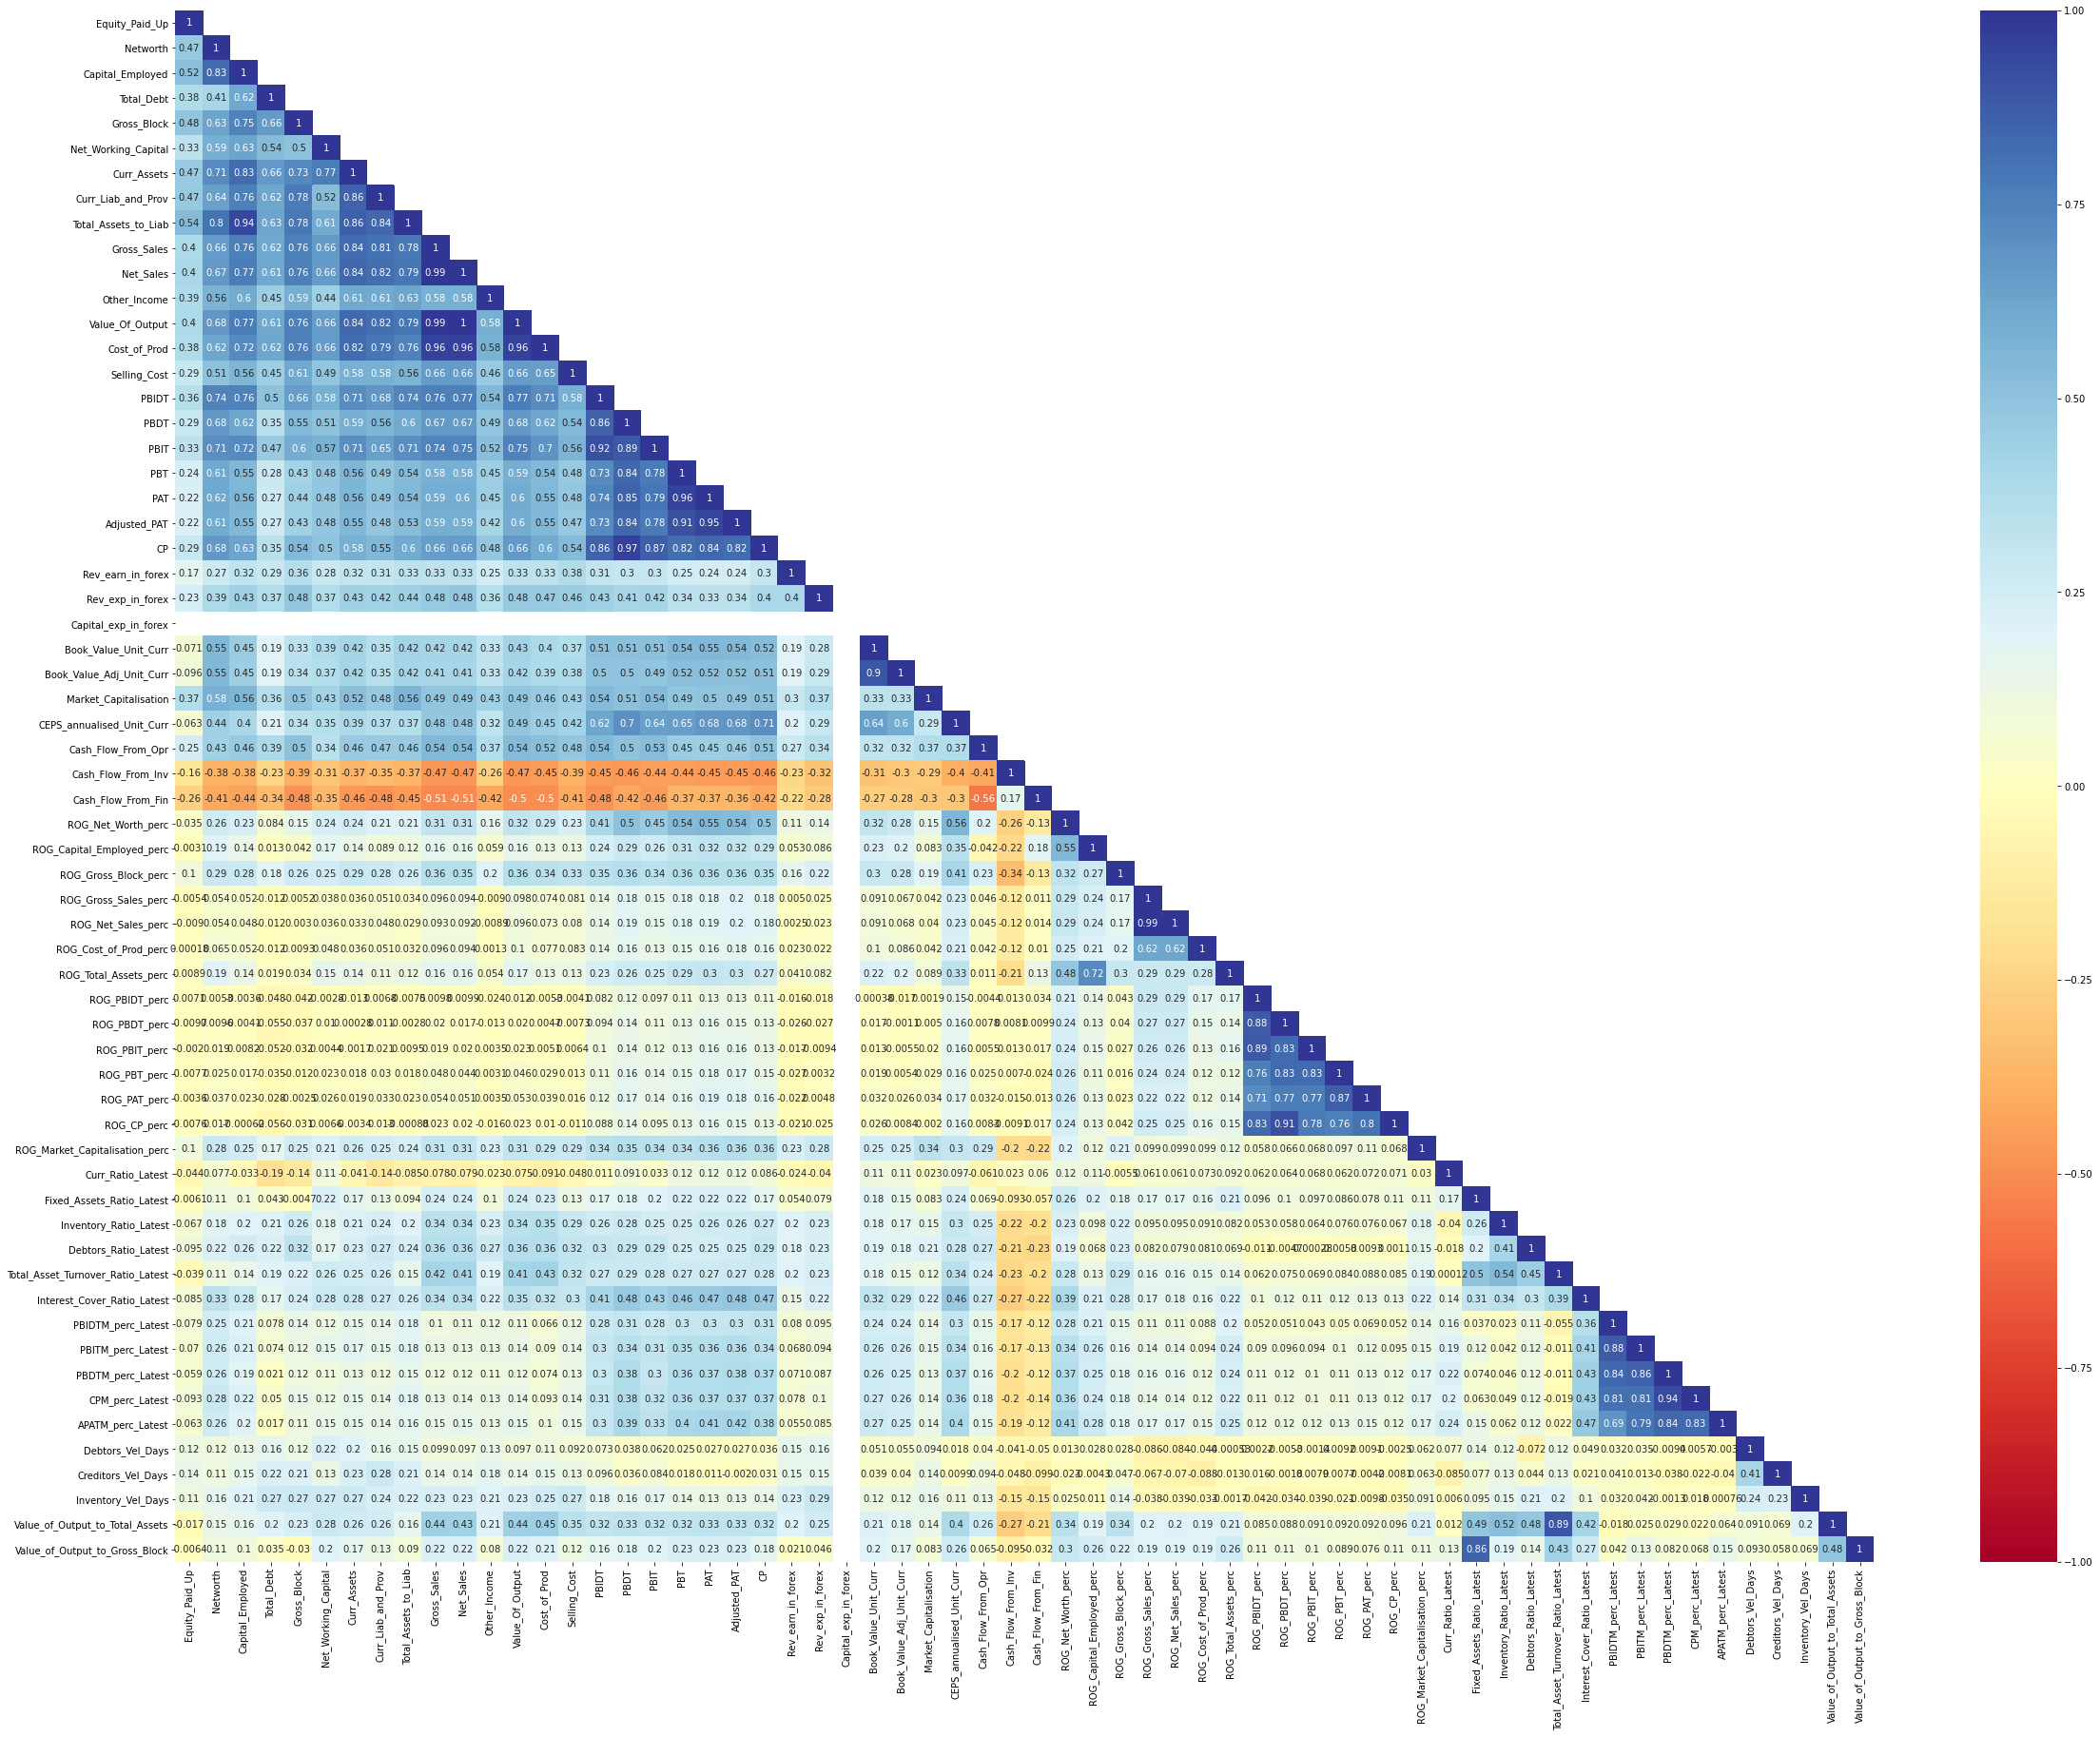

In [68]:
plt.figure(figsize = (40,30))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'RdYlBu', annot=True,vmin = -1, vmax= 1, mask=np.triu(cor_matrix,+1))

Some of the variable is high postively correlated and some of the variables are slightly negative correlated

In [69]:
company_copy=Company_imputed.copy()

In [70]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [71]:
from sklearn.model_selection import train_test_split

Splitting the data into train and test sets

In [72]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42)

In [73]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (2402, 62)
The training set for the dependent variable: (2402,)
The test set for the independent variables: (1184, 62)
The test set for the dependent variable: (1184,)


### 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

For modeling we will use Random Forest Model with feature importance.

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [15,20],
    'min_samples_leaf': [10,20],
    'min_samples_split': [ 50,100],
    'n_estimators': [301,401,701]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [10, 20],
                         'min_samples_split': [50, 100],
                         'n_estimators': [301, 401, 701]})

In [76]:
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'n_estimators': 701}

In [77]:
best_grid = grid_search.best_estimator_

In [78]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [79]:
ytrain_predict_prob_rm= best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_rm).head()

0    1
0 0.99 0.01
1 1.00 0.00
2 0.94 0.06
3 0.95 0.05
4 1.00 0.00

In [80]:
ytest_predict_prob_rm=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_rm).head()

0    1
0 0.99 0.01
1 0.98 0.02
2 0.90 0.10
3 0.15 0.85
4 0.94 0.06

In [81]:
print(pd.DataFrame(best_grid.feature_importances_, columns=["IMP"],index = X_train.columns).sort_values('IMP',ascending =False))

                                   IMP
Book_Value_Unit_Curr              0.22
Networth                          0.22
Book_Value_Adj_Unit_Curr          0.21
Curr_Ratio_Latest                 0.06
Capital_Employed                  0.04
PBIDT                             0.03
CEPS_annualised_Unit_Curr         0.02
CP                                0.02
PBDT                              0.02
Net_Working_Capital               0.02
Adjusted_PAT                      0.01
Total_Asset_Turnover_Ratio_Latest 0.01
PBIT                              0.01
PAT                               0.01
PBITM_perc_Latest                 0.01
PBT                               0.01
Interest_Cover_Ratio_Latest       0.01
Total_Debt                        0.01
ROG_Net_Worth_perc                0.01
PBDTM_perc_Latest                 0.01
PBIDTM_perc_Latest                0.00
Total_Assets_to_Liab              0.00
Value_of_Output_to_Gross_Block    0.00
CPM_perc_Latest                   0.00
Fixed_Assets_Ratio_Latest

In [82]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

### 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

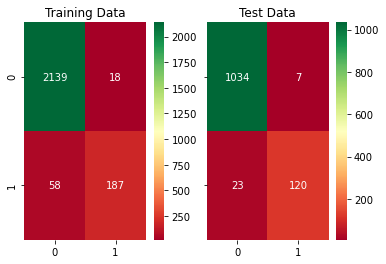

In [83]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_train_rf)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, pred_test_rf)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [84]:
print(classification_report(y_train, pred_train_rf),'\n');
print(classification_report(y_test, pred_test_rf),'\n');

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2157
         1.0       0.91      0.76      0.83       245

    accuracy                           0.97      2402
   macro avg       0.94      0.88      0.91      2402
weighted avg       0.97      0.97      0.97      2402
 

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1041
         1.0       0.94      0.84      0.89       143

    accuracy                           0.97      1184
   macro avg       0.96      0.92      0.94      1184
weighted avg       0.97      0.97      0.97      1184
 



In [151]:
rf_train_acc=best_grid.score(X_train,y_train) 
rf_train_acc

0.9683597002497918

In [154]:
rf_test_acc=best_grid.score(X_test,y_test) 
rf_test_acc

0.9746621621621622

In [153]:
rf_metrics=classification_report(y_train, pred_train_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1.0"][0],2)
rf_train_recall=round(df.loc["1.0"][1],2)
rf_train_f1=round(df.loc["1.0"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.91
rf_train_recall  0.76
rf_train_f1  0.83


In [155]:
rf_metrics=classification_report(y_test, pred_test_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1.0"][0],2)
rf_test_recall=round(df.loc["1.0"][1],2)
rf_test_f1=round(df.loc["1.0"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.94
rf_test_recall  0.84
rf_test_f1  0.89


AUC for the Training Data: 0.994
AUC for the Test Data: 0.990


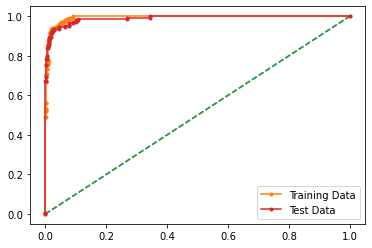

In [168]:
# AUC and ROC for the training data

# calculate AUC
train_auc_rf = metrics.roc_auc_score(y_train,ytrain_predict_prob_rm[:,1])
print('AUC for the Training Data: %.3f' % train_auc_rf)

#  calculate roc curve
rf_train_fpr, rf_train_tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_rm[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_rf = metrics.roc_auc_score(y_test,ytest_predict_prob_rm[:,1])
print('AUC for the Test Data: %.3f' %test_auc_rf )

#  calculate roc curve
rf_test_fpr, rf_test_tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_rm[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## 1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [87]:
LDA = LinearDiscriminantAnalysis()

In [88]:
lda_model = LDA.fit(X_train, y_train)

In [89]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [90]:
ytrain_predict_prob_lda= lda_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_lda).head()

0    1
0 0.96 0.04
1 1.00 0.00
2 0.55 0.45
3 1.00 0.00
4 1.00 0.00

In [91]:
ytest_predict_prob_lda= lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lda).head()

0    1
0 0.98 0.02
1 0.95 0.05
2 0.86 0.14
3 0.92 0.08
4 1.00 0.00

### 1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

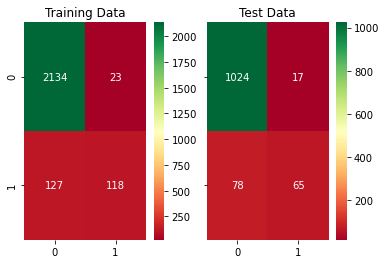

In [92]:
#Confusion matrix on the training and test data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_train_lda)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, pred_test_lda)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [93]:
print(classification_report(y_train, pred_train_lda),'\n');
print(classification_report(y_test, pred_test_lda),'\n');

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2157
         1.0       0.84      0.48      0.61       245

    accuracy                           0.94      2402
   macro avg       0.89      0.74      0.79      2402
weighted avg       0.93      0.94      0.93      2402
 

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1041
         1.0       0.79      0.45      0.58       143

    accuracy                           0.92      1184
   macro avg       0.86      0.72      0.77      1184
weighted avg       0.91      0.92      0.91      1184
 



In [161]:
lda_metrics=classification_report(y_train, pred_train_lda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(df.loc["1.0"][0],2)
lda_train_recall=round(df.loc["1.0"][1],2)
lda_train_f1=round(df.loc["1.0"][2],2)
lda_train_acc=round(df.loc["accuracy"][2],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
print ('lda_train_acc ',lda_train_acc)

lda_train_precision  0.84
lda_train_recall  0.48
lda_train_f1  0.61
lda_train_acc  0.94


In [162]:
lda_metrics=classification_report(y_test, pred_test_lda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["1.0"][0],2)
lda_test_recall=round(df.loc["1.0"][1],2)
lda_test_f1=round(df.loc["1.0"][2],2)
lda_test_acc=round(df.loc["accuracy"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)
print ('lda_test_acc ',lda_test_acc)

lda_test_precision  0.79
lda_test_recall  0.45
lda_test_f1  0.58
lda_test_acc  0.92


AUC for the Training Data: 0.950
AUC for the Test Data: 0.935


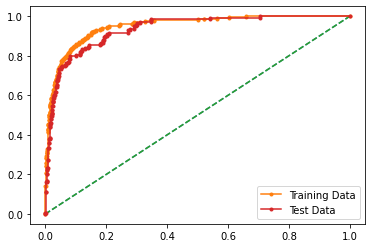

In [169]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lda = metrics.roc_auc_score(y_train,ytrain_predict_prob_lda[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda)

#  calculate roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lda = metrics.roc_auc_score(y_test,ytest_predict_prob_lda[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lda )

#  calculate roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [95]:
grid_lda={
      'solver':['svd', 'lsqr', 'eigen'],
      
     }

In [96]:
model_lda = LinearDiscriminantAnalysis()

In [97]:
grid_search_lda = GridSearchCV(estimator = model_lda, param_grid = grid_lda, cv = 7,n_jobs=-1,scoring='accuracy')

In [98]:
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [99]:
print(grid_search_lda.best_params_,'\n')
print(grid_search_lda.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [100]:
best_model_lda = grid_search_lda.best_estimator_

In [101]:
ytrain_predictlda = best_model_lda.predict(X_train)
ytest_predictlda = best_model_lda.predict(X_test)

In [102]:
ytrain_predict_problda=best_model_lda.predict_proba(X_train)
pd.DataFrame(ytrain_predict_problda).head()

0    1
0 0.96 0.04
1 1.00 0.00
2 0.55 0.45
3 1.00 0.00
4 1.00 0.00

In [103]:
ytest_predict_problda=best_model_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_problda).head()

0    1
0 0.98 0.02
1 0.95 0.05
2 0.86 0.14
3 0.92 0.08
4 1.00 0.00

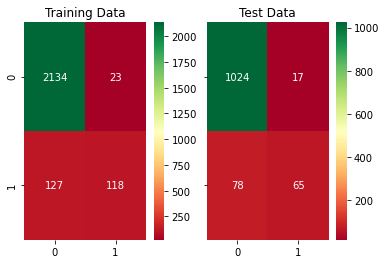

In [104]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predictlda)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predictlda)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [105]:
print(classification_report(y_train,ytrain_predictlda),'\n');
print(classification_report(y_test,ytest_predictlda),'\n');

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2157
         1.0       0.84      0.48      0.61       245

    accuracy                           0.94      2402
   macro avg       0.89      0.74      0.79      2402
weighted avg       0.93      0.94      0.93      2402
 

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1041
         1.0       0.79      0.45      0.58       143

    accuracy                           0.92      1184
   macro avg       0.86      0.72      0.77      1184
weighted avg       0.91      0.92      0.91      1184
 



In [163]:
lda_metrics=classification_report(y_train, ytrain_predictlda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_precision1=round(df.loc["1.0"][0],2)
lda_train_recall1=round(df.loc["1.0"][1],2)
lda_train_f11=round(df.loc["1.0"][2],2)
lda_train_acc1=round(df.loc["accuracy"][2],2)
print ('lda_train_precision1 ',lda_train_precision1)
print ('lda_train_recall1 ',lda_train_recall1)
print ('lda_train_f11 ',lda_train_f11)
print ('lda_train_acc1 ',lda_train_acc1)

lda_train_precision1  0.84
lda_train_recall1  0.48
lda_train_f11  0.61
lda_train_acc1  0.94


In [164]:
lda_metrics=classification_report(y_test, ytest_predictlda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision1=round(df.loc["1.0"][0],2)
lda_test_recall1=round(df.loc["1.0"][1],2)
lda_test_f11=round(df.loc["1.0"][2],2)
lda_test_acc1=round(df.loc["accuracy"][2],2)
print ('lda_test_precision1 ',lda_test_precision1)
print ('lda_test_recall1 ',lda_test_recall1)
print ('lda_test_f11 ',lda_test_f11)
print ('lda_test_acc1 ',lda_test_acc1)

lda_test_precision1  0.79
lda_test_recall1  0.45
lda_test_f11  0.58
lda_test_acc1  0.92


AUC for the Training Data: 0.950
AUC for the Test Data: 0.935


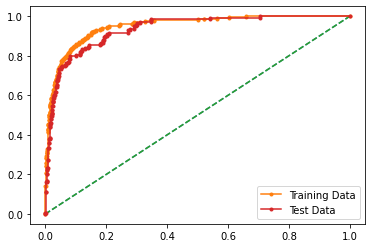

In [170]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lda1 = metrics.roc_auc_score(y_train,ytrain_predict_problda[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda1)

#  calculate roc curve
lda_train1_fpr, lda_train1_tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_problda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train1_fpr, lda_train1_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lda1 = metrics.roc_auc_score(y_test,ytest_predict_problda[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lda1 )

#  calculate roc curve
lda_test1_fpr, lda_test1_tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_problda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test1_fpr, lda_test1_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### For modeling we will use Logistic Regression with recursive feature elimination


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [109]:
LogR = LogisticRegression()

In [110]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [111]:
selector = selector.fit(X_train, y_train)

In [112]:
selector.n_features_

15

In [113]:
selector.ranking_

array([38,  1,  1,  4,  1, 11, 10,  1,  1, 20, 40, 17,  1,  1, 24,  1,  2,
        1, 13, 15, 16,  3, 46, 21, 48,  1,  1, 18, 47, 45, 14, 32,  1,  1,
       39, 34, 35,  9, 23, 43, 42, 30, 41, 29, 44, 36,  1, 12, 28, 33,  7,
        1, 27,  5, 25, 26,  6, 31, 19, 22,  8, 37])

In [114]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

Feature  Rank
1                      Networth     1
2              Capital_Employed     1
4                   Gross_Block     1
7            Curr_Liab_and_Prov     1
8          Total_Assets_to_Liab     1
12              Value_Of_Output     1
13                 Cost_of_Prod     1
15                        PBIDT     1
17                         PBIT     1
25         Book_Value_Unit_Curr     1
26     Book_Value_Adj_Unit_Curr     1
32           ROG_Net_Worth_perc     1
33    ROG_Capital_Employed_perc     1
46            Curr_Ratio_Latest     1
51  Interest_Cover_Ratio_Latest     1

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

In [116]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

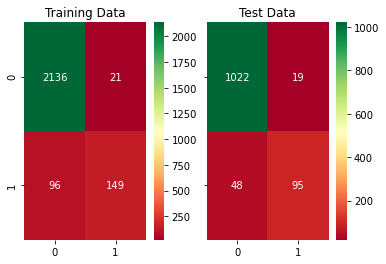

In [117]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_train)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, pred_test)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [118]:
print(classification_report(y_train, pred_train),'\n');
print(classification_report(y_test, pred_test),'\n');

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.88      0.61      0.72       245

    accuracy                           0.95      2402
   macro avg       0.92      0.80      0.85      2402
weighted avg       0.95      0.95      0.95      2402
 

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.83      0.66      0.74       143

    accuracy                           0.94      1184
   macro avg       0.89      0.82      0.85      1184
weighted avg       0.94      0.94      0.94      1184
 



In [119]:
ytrain_predict_prob_lr= selector.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_lr).head()

0    1
0 0.90 0.10
1 1.00 0.00
2 0.92 0.08
3 1.00 0.00
4 1.00 0.00

In [120]:
ytest_predict_prob_lr= selector.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lr).head()

0    1
0 1.00 0.00
1 1.00 0.00
2 0.81 0.19
3 0.07 0.93
4 1.00 0.00

AUC for the Training Data: 0.958
AUC for the Test Data: 0.967


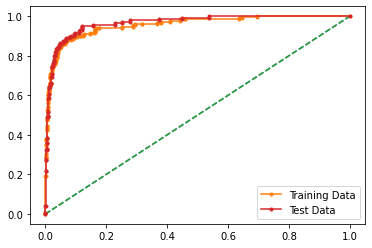

In [171]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr = metrics.roc_auc_score(y_train,ytrain_predict_prob_lr[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr)

#  calculate roc curve
lr_train_fpr, lr_train_tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_lr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr = metrics.roc_auc_score(y_test,ytest_predict_prob_lr[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr )

#  calculate roc curve
lr_test_fpr, lr_test_tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_lr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [122]:
grid1={'penalty':['l2'],
      'solver':['saga'],
      'max_iter':[1000,100],
      'tol':[0.00001,0.001]
     }

In [123]:
modellr = LogisticRegression()

In [124]:
grid_searchlr = GridSearchCV(estimator = modellr, param_grid = grid1, cv = 7,n_jobs=-1,scoring='accuracy')

In [125]:
grid_searchlr.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [1000, 100], 'penalty': ['l2'],
                         'solver': ['saga'], 'tol': [1e-05, 0.001]},
             scoring='accuracy')

In [126]:
print(grid_searchlr.best_params_,'\n')
print(grid_searchlr.best_estimator_)

{'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 1e-05} 

LogisticRegression(max_iter=1000, solver='saga', tol=1e-05)


In [127]:
best_modellr = grid_searchlr.best_estimator_

In [128]:
ytrain_predictlr = best_modellr.predict(X_train)
ytest_predictlr = best_modellr.predict(X_test)

In [129]:
ytrain_predict_problr=best_modellr.predict_proba(X_train)
pd.DataFrame(ytrain_predict_problr).head()

0    1
0 0.90 0.10
1 1.00 0.00
2 0.89 0.11
3 1.00 0.00
4 1.00 0.00

In [130]:
ytest_predict_problr=best_modellr.predict_proba(X_test)
pd.DataFrame(ytest_predict_problr).head()

0    1
0 1.00 0.00
1 1.00 0.00
2 0.82 0.18
3 0.26 0.74
4 1.00 0.00

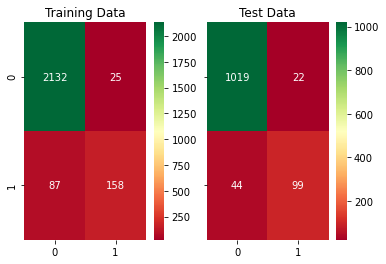

In [131]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predictlr)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predictlr)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [132]:
print(classification_report(y_train,ytrain_predictlr),'\n');
print(classification_report(y_test,ytest_predictlr),'\n');

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.86      0.64      0.74       245

    accuracy                           0.95      2402
   macro avg       0.91      0.82      0.86      2402
weighted avg       0.95      0.95      0.95      2402
 

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.82      0.69      0.75       143

    accuracy                           0.94      1184
   macro avg       0.89      0.84      0.86      1184
weighted avg       0.94      0.94      0.94      1184
 



AUC for the Training Data: 0.965
AUC for the Test Data: 0.966


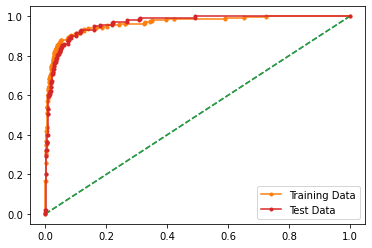

In [172]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr1 = metrics.roc_auc_score(y_train,ytrain_predict_problr[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr1)

#  calculate roc curve
lr_train1_fpr, lr_train1_tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_problr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train1_fpr, lr_train1_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr1 = metrics.roc_auc_score(y_test,ytest_predict_problr[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr1)

#  calculate roc curve
lr_test1_fpr, lr_test1_tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_problr[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test1_fpr, lr_test1_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [134]:
import statsmodels.formula.api as SM

In [135]:
df[df['Rank'] == 1]

Feature  Rank
1                      Networth     1
2              Capital_Employed     1
4                   Gross_Block     1
7            Curr_Liab_and_Prov     1
8          Total_Assets_to_Liab     1
12              Value_Of_Output     1
13                 Cost_of_Prod     1
15                        PBIDT     1
17                         PBIT     1
25         Book_Value_Unit_Curr     1
26     Book_Value_Adj_Unit_Curr     1
32           ROG_Net_Worth_perc     1
33    ROG_Capital_Employed_perc     1
46            Curr_Ratio_Latest     1
51  Interest_Cover_Ratio_Latest     1

In [137]:
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

In [139]:
model_1 = SM.logit(formula = 'default ~Networth+Capital_Employed+Gross_Block+Curr_Liab_and_Prov+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+PBIDT+PBIT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest' , data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.136292
         Iterations 10


In [140]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Sun, 27 Mar 2022   Pseudo R-squ.:                  0.5863
Time:                        12:53:38   Log-Likelihood:                -327.37
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.686e-188
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.2239      0.292    -17.872      0.000      -5.797      -4.651
Networth                       -1.5555      0.334     -4.664      0.000      -2.209      -0.902
Capital_Employed               -0.7493      0.309     -2.424      0.015      -1.355      -0.143
Gross_Block                     0.8500      0.228      3.733      0.000       0.404       1.296
Curr_Liab_and_Prov              0.7379      0.236      3.125      0.002       0.275       1.201
Total_Assets_to_Liab            0.7680      0.306      2.509      0.012       0.168       1.368
Value_Of_Output                -1.8154      0.552     -3.290      0.001      -2.897      -0.734
Cost_of_Prod                    1.6849      0.489      3.447      0.001       0.727       2.643
PBIDT                          -1.2197      0.257     -4.745      0.000      -1.724      -0.716
PBIT                            0.9219      0.251      3.670      0.000       0.430       1.414
Book_Value_Unit_Curr           -2.0100      0.544     -3.693      0.000      -3.077      -0.943
Book_Value_Adj_Unit_Curr       -1.5899      0.539     -2.950      0.003      -2.646      -0.533
ROG_Net_Worth_perc             -0.5607      0.149     -3.768      0.000      -0.852      -0.269
ROG_Capital_Employed_perc       0.4830      0.132      3.672      0.000       0.225       0.741
Curr_Ratio_Latest              -1.0811      0.163     -6.639      0.000      -1.400      -0.762
Interest_Cover_Ratio_Latest    -0.7117      0.167     -4.265      0.000      -1.039      -0.385
===============================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [141]:
y_prob_pred_train = model_1.predict(Default_train)

In [142]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [143]:
from sklearn import metrics

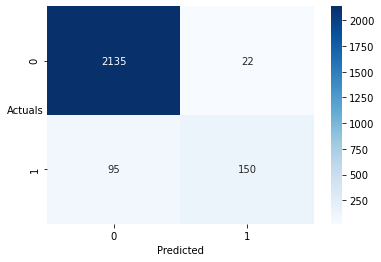

In [144]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [145]:
from sklearn.metrics import confusion_matrix, classification_report

In [146]:
print(metrics.classification_report(Default_train['default'], y_class_pred, digits=2))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.87      0.61      0.72       245

    accuracy                           0.95      2402
   macro avg       0.91      0.80      0.85      2402
weighted avg       0.95      0.95      0.95      2402



In [165]:
lr_metrics=classification_report(y_train, y_class_pred,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_precision1=round(df.loc["1.0"][0],2)
lr_train_recall1=round(df.loc["1.0"][1],2)
lr_train_f11=round(df.loc["1.0"][2],2)
lr_train_acc1=round(df.loc["accuracy"][2],2)
print ('lr_train_precision1 ',lr_train_precision1)
print ('lr_train_recall1 ',lr_train_recall1)
print ('lr_train_f11 ',lr_train_f11)
print ('lr_train_acc1 ',lr_train_acc1)

lr_train_precision1  0.87
lr_train_recall1  0.61
lr_train_f11  0.72
lr_train_acc1  0.95


In [147]:
y_prob_pred_test = model_1.predict(Default_test)

In [148]:
y_class_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

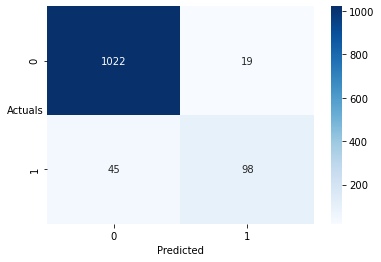

In [149]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [150]:
print(metrics.classification_report(Default_test['default'], y_class_pred_test, digits=2))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.84      0.69      0.75       143

    accuracy                           0.95      1184
   macro avg       0.90      0.83      0.86      1184
weighted avg       0.94      0.95      0.94      1184



In [166]:
lr_metrics=classification_report(y_test, y_class_pred_test,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_precision1=round(df.loc["1.0"][0],2)
lr_test_recall1=round(df.loc["1.0"][1],2)
lr_test_f11=round(df.loc["1.0"][2],2)
lr_test_acc1=round(df.loc["accuracy"][2],2)
print ('lr_test_precision1 ',lr_test_precision1)
print ('lr_test_recall1 ',lr_test_recall1)
print ('lr_test_f11 ',lr_test_f11)
print ('lr_test_acc1 ',lr_test_acc1)

lr_test_precision1  0.84
lr_test_recall1  0.69
lr_test_f11  0.75
lr_test_acc1  0.95


### 1.12 Compare the performances of Logistics, Radom Forest and LDA models (include ROC Curve)

In [167]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[lr_train_acc1,train_auc_lr1,lr_train_recall1,lr_train_precision1,lr_train_f11],
        'Logistic Regression Test':[lr_test_acc1,test_auc_lr1,lr_test_recall1,lr_test_precision1,lr_test_f11],
       'Random Forest Train':[rf_train_acc,train_auc_rf,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,test_auc_rf,rf_test_recall,rf_test_precision,rf_test_f1],
       'LDA Train':[lda_train_acc1,train_auc_lda1,lda_train_recall1,lda_train_precision1,lda_train_f11],
        'LDA Test':[lda_test_acc1,test_auc_lda1,lda_test_recall1,lda_test_precision1,lda_test_f11]},index=index)
round(data,2)

Logistic Regression Train  Logistic Regression Test  \
Accuracy                        0.95                      0.95   
AUC                             0.96                      0.97   
Recall                          0.61                      0.69   
Precision                       0.87                      0.84   
F1 Score                        0.72                      0.75   

           Random Forest Train  Random Forest Test  LDA Train  LDA Test  
Accuracy                  0.97                0.97       0.94      0.92  
AUC                       0.99                0.99       0.95      0.94  
Recall                    0.76                0.84       0.48      0.45  
Precision                 0.91                0.94       0.84      0.79  
F1 Score                  0.83                0.89       0.61      0.58

ROC Curve for the 3 models on the Train data

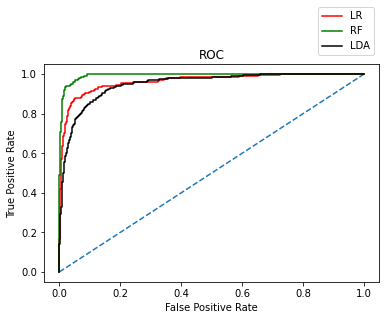

In [173]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train1_fpr, lr_train1_tpr,color='red',label="LR")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(lda_train1_fpr,lda_train1_tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC Curve for the 3 models on the Test data

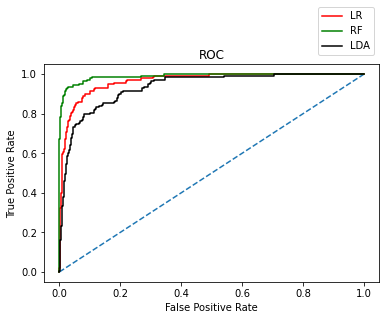

In [174]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test1_fpr, lr_test1_tpr,color='red',label="LR")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(lda_test1_fpr,lda_test1_tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### 1.13 State Recommendations from the above models

Out of the 3 models, Random Forest has better performance than the Logistic regression and LDA model. Overall all the 3 models are reasonably stable enough to be used for making any future predictions. From Random Forest Model, the variable change is found to be the most useful feature amongst all other features for predicting if a person has defaulter or not. If change is yes, then those person have more chances for default.


Finally, we are able to achieve a descent recall value without over fitting by using Random Forest. Considering the opportunities such as outliers, missing values and correlated features this is a fairly good model. It can be improved if we get better quality data where the features explaining the default are not missing to this extent. Of course we can try other techniques which are not sensitive towards missing values and outliers.